In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import torch
import torch.nn as nn
import pickle
from tqdm import trange, tqdm
from scipy.stats import pearsonr

# Layer comparison

In [3]:
def plot_roi_correlations(
    roi_name: str,
    results_dir: str = "results",
    n_layers: int = 12,
    figsize: tuple = (10, 6),
    save_path: str = None
):
   
    results_path = Path(results_dir)
    
    layers = list(range(1, n_layers + 1))
    subject_correlations = {f"sub{i}": [] for i in range(1, 5)}  #
    mean_correlations = []
    
    # Carica i dati per ogni layer
    for layer in layers:
        csv_name = f"voxel_correlations_{roi_name}_layer{layer}_all_subjects.csv"
        csv_path = results_path / f"layer{layer}" / csv_name
        
        try:
            df = pd.read_csv(csv_path)
            
            for sub_idx in range(1, 5):
                col_name = f"correlation_sub{sub_idx}"
                mean_corr = df[col_name].mean()
                subject_correlations[f"sub{sub_idx}"].append(mean_corr)
            
            layer_mean = np.mean([subject_correlations[f"sub{i}"][-1] for i in range(1, 5)])
            mean_correlations.append(layer_mean)
            
        except FileNotFoundError:
            print(f"Warning: File non trovato: {csv_path}")
            for sub in subject_correlations:
                subject_correlations[sub].append(np.nan)
            mean_correlations.append(np.nan)
    
    # Creazione del grafico
    fig, ax = plt.subplots(figsize=figsize)
    
    # Colori per i soggetti (stesso colore, diversi punti)
    color = "#1f77b4"  # Blu standard matplotlib
    
    # Plot scatter per ogni soggetto
    for sub_idx in range(1, 5):
        sub_key = f"sub{sub_idx}"
        ax.scatter(
            layers, 
            subject_correlations[sub_key],
            c=color,
            s=40,
            alpha=0.6,
            zorder=2
        )
    
    # Plot linea della media
    ax.plot(
        layers,
        mean_correlations,
        c=color,
        linewidth=2,
        label=f"{roi_name}",
        zorder=3
    )
    
    # Configurazione estetica
    ax.set_xlabel("Layer", fontsize=12)
    ax.set_ylabel("Mean Voxel Correlation", fontsize=12)
    ax.set_title(f"Layer-wise Encoding Performance: {roi_name}", fontsize=14)
    ax.set_xticks(layers)
    ax.set_xticklabels(layers)
    ax.grid(True, alpha=0.3, zorder=1)
    ax.legend(loc="best")
    
    # Limiti Y con un po' di padding
    all_values = [v for sub in subject_correlations.values() for v in sub if not np.isnan(v)]
    if all_values:
        y_min, y_max = min(all_values), max(all_values)
        padding = (y_max - y_min) * 0.1
        ax.set_ylim(y_min - padding, y_max + padding)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figura salvata in: {save_path}")
    
    return fig, ax

In [4]:
def plot_all_rois_comparison(
    roi_names: list,
    results_dir: str = "results",
    n_layers: int = 12,
    figsize: tuple = (12, 7),
    save_path: str = None
):
    """
    Genera un grafico comparativo di tutte le ROI sullo stesso plot.
    
    Parameters
    ----------
    roi_names : list
        Lista dei nomi delle ROI
    results_dir : str
        Directory contenente i CSV dei risultati
    n_layers : int
        Numero di layer
    figsize : tuple
        Dimensioni della figura
    save_path : str, optional
        Path dove salvare la figura
    """
    
    results_path = Path(results_dir)
    layers = list(range(1, n_layers + 1))
    
    # Colori distinti per ogni ROI
    colors = plt.cm.tab10(np.linspace(0, 1, len(roi_names)))
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for roi_idx, roi_name in enumerate(roi_names):
        color = colors[roi_idx]
        
        subject_correlations = {f"sub{i}": [] for i in range(1, 5)}
        mean_correlations = []
        
        for layer in layers:
            csv_name = f"voxel_correlations_{roi_name}_layer{layer}_all_subjects.csv"
            csv_path = results_path / f"layer{layer}" / csv_name
            
            try:
                df = pd.read_csv(csv_path)
                
                for sub_idx in range(1, 5):
                    col_name = f"correlation_sub{sub_idx}"
                    mean_corr = df[col_name].mean()
                    subject_correlations[f"sub{sub_idx}"].append(mean_corr)
                
                layer_mean = np.mean([subject_correlations[f"sub{i}"][-1] for i in range(1, 5)])
                mean_correlations.append(layer_mean)
                
            except FileNotFoundError:
                for sub in subject_correlations:
                    subject_correlations[sub].append(np.nan)
                mean_correlations.append(np.nan)
        
        # Scatter per ogni soggetto
        for sub_idx in range(1, 5):
            sub_key = f"sub{sub_idx}"
            ax.scatter(
                layers,
                subject_correlations[sub_key],
                c=[color],
                s=30,
                alpha=0.5,
                zorder=2
            )
        
        # Linea media
        ax.plot(
            layers,
            mean_correlations,
            c=color,
            linewidth=2,
            label=roi_name,
            zorder=3
        )
    
    ax.set_xlabel("Layer", fontsize=12)
    ax.set_ylabel("Mean Voxel Correlation", fontsize=12)
    ax.set_title("Layer-wise Encoding Performance Across ROIs", fontsize=14)
    ax.set_xticks(layers)
    ax.grid(True, alpha=0.3, zorder=1)
    ax.legend(loc="best", fontsize=10)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figura salvata in: {save_path}")
    
    return fig, ax

## SINGLE FEDORENKO ZONE

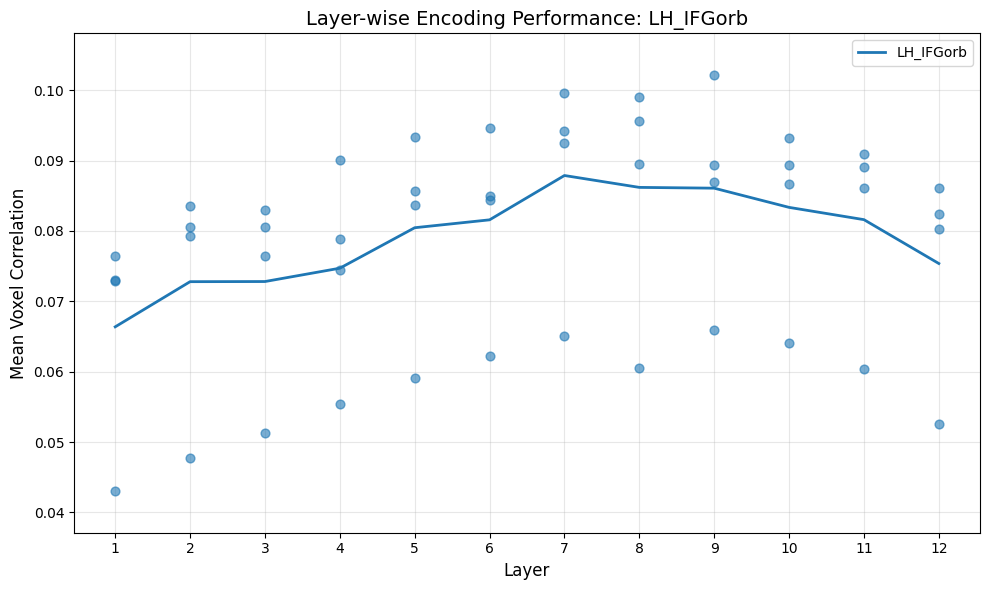

In [5]:
fig, ax = plot_roi_correlations("LH_IFGorb", results_dir="results")
plt.show()

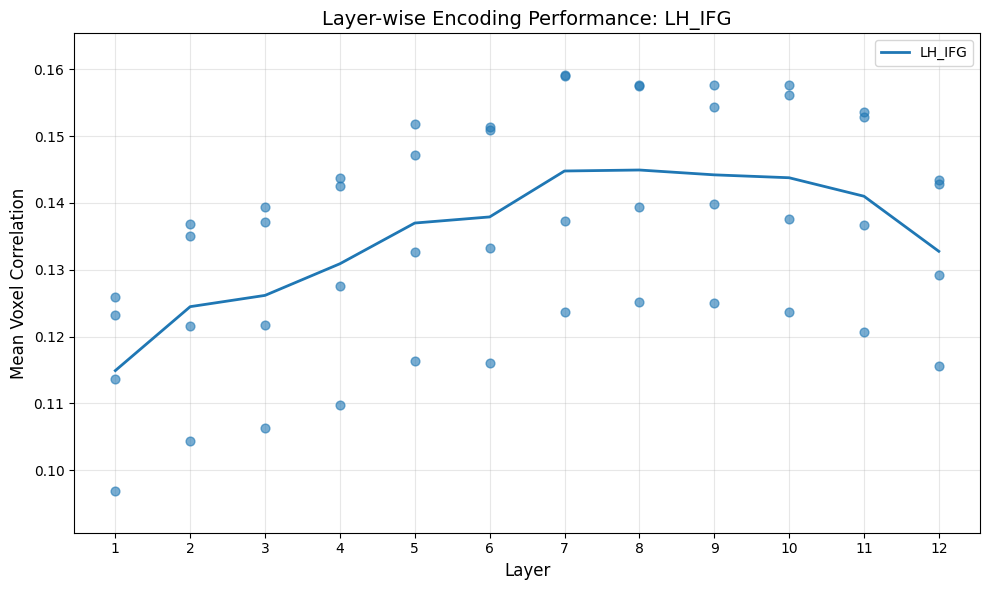

In [6]:
fig, ax = plot_roi_correlations("LH_IFG", results_dir="results")
plt.show()

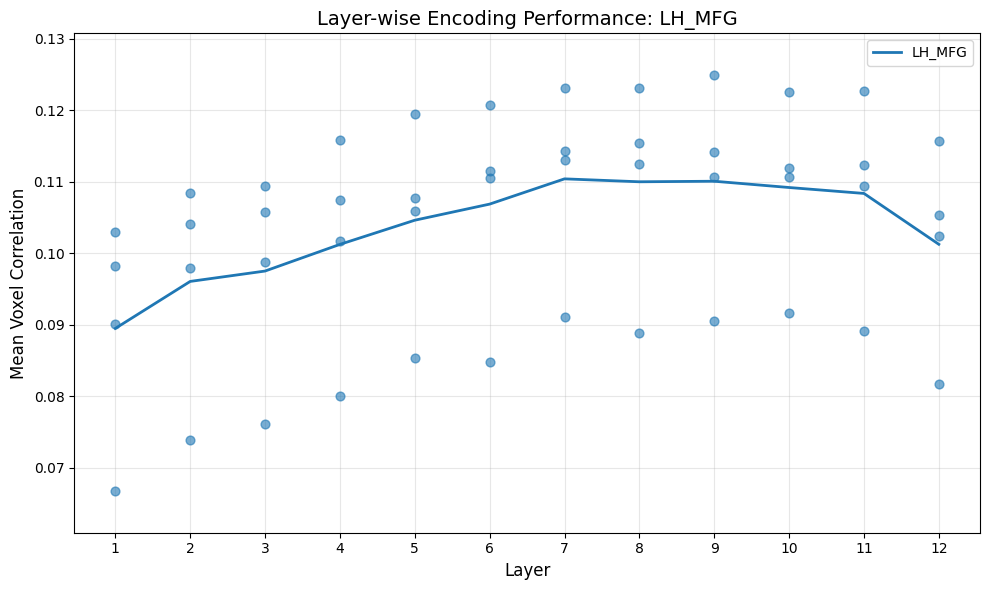

In [7]:
fig, ax = plot_roi_correlations("LH_MFG", results_dir="results")
plt.show()

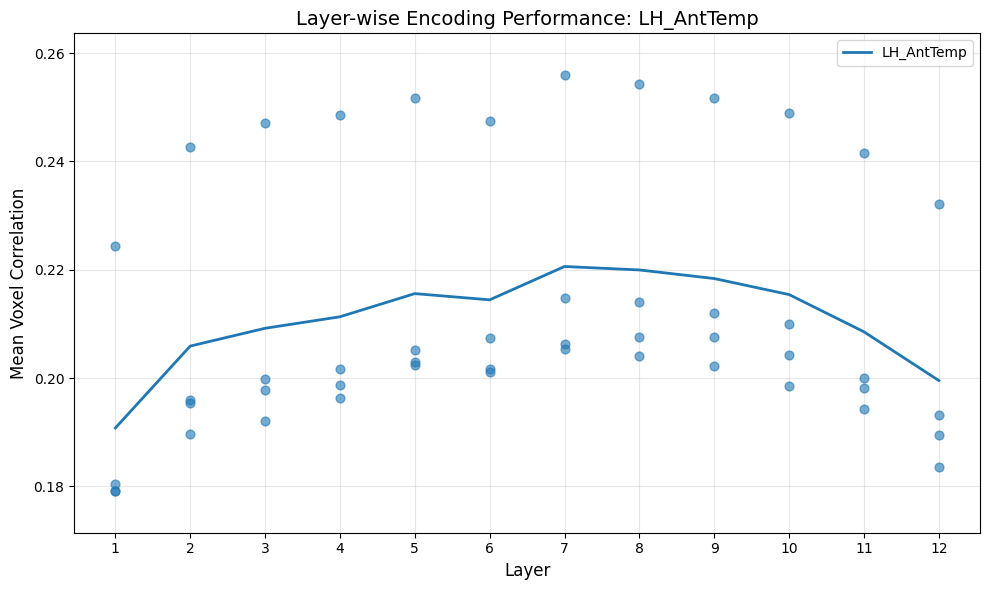

In [8]:
fig, ax = plot_roi_correlations("LH_AntTemp", results_dir="results")
plt.show()

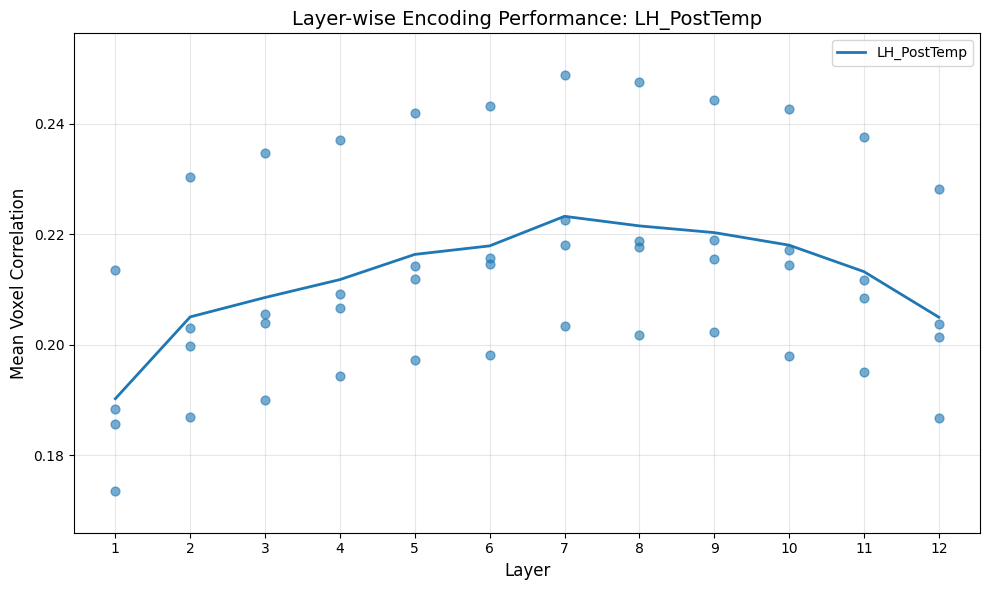

In [9]:
fig, ax = plot_roi_correlations("LH_PostTemp", results_dir="results")
plt.show()

## ALL

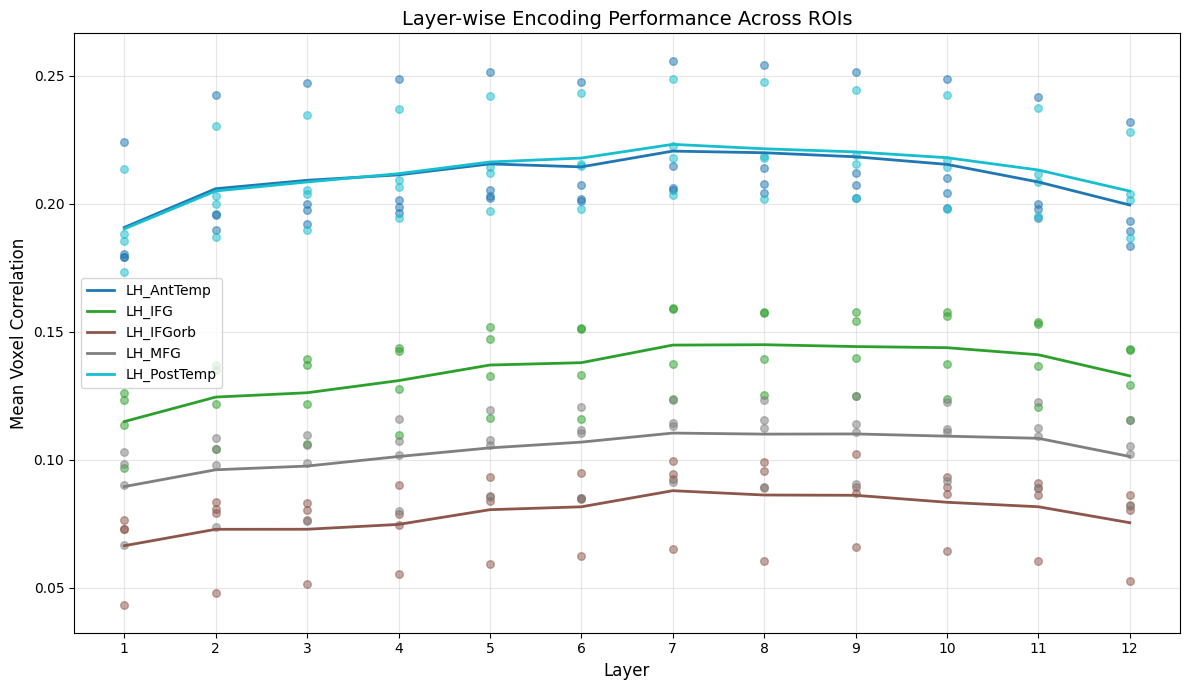

In [10]:
fig, ax = plot_all_rois_comparison(
    ["LH_AntTemp", "LH_IFG", "LH_IFGorb", "LH_MFG", "LH_PostTemp"],
    results_dir="results"
)
plt.show()

# Analyze IG

In [16]:
all_igs = pickle.load(open("FIM_Results_All_Combinations.pkl", "rb"))
print(all_igs.keys())
print(all_igs['layer_1'].keys())

dict_keys(['layer_1', 'layer_2', 'layer_3', 'layer_4', 'layer_5', 'layer_6', 'layer_7', 'layer_8', 'layer_9', 'layer_10', 'layer_11', 'layer_12'])
dict_keys(['LH_IFGorb', 'LH_IFG', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp'])


   layer          roi  mean_importance  max_importance  total_importance  \
0      1    LH_IFGorb         0.010267        0.013201          0.023468   
1      1       LH_IFG         0.011772        0.013056          0.024828   
2      1       LH_MFG         0.009933        0.010920          0.020853   
3      1   LH_AntTemp         0.043440        0.045004          0.088444   
4      1  LH_PostTemp         0.036529        0.038710          0.075238   
5      2    LH_IFGorb         0.009942        0.012888          0.022830   
6      2       LH_IFG         0.011367        0.013305          0.024672   
7      2       LH_MFG         0.009124        0.010487          0.019611   
8      2   LH_AntTemp         0.050823        0.048942          0.099765   
9      2  LH_PostTemp         0.037456        0.037806          0.075262   

   mean_ratio  max_ratio  mean_minus_max  log_ratio  
0    0.437480   0.562520       -0.002934  -0.362688  
1    0.474153   0.525847       -0.001283  -0.149293  
2

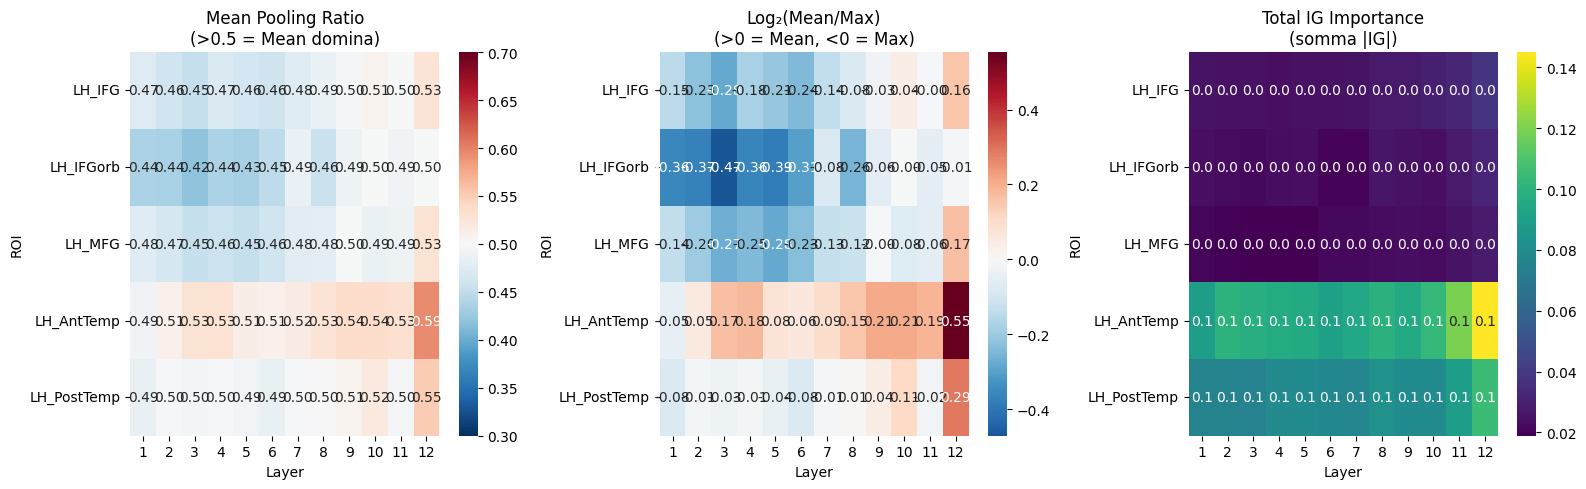

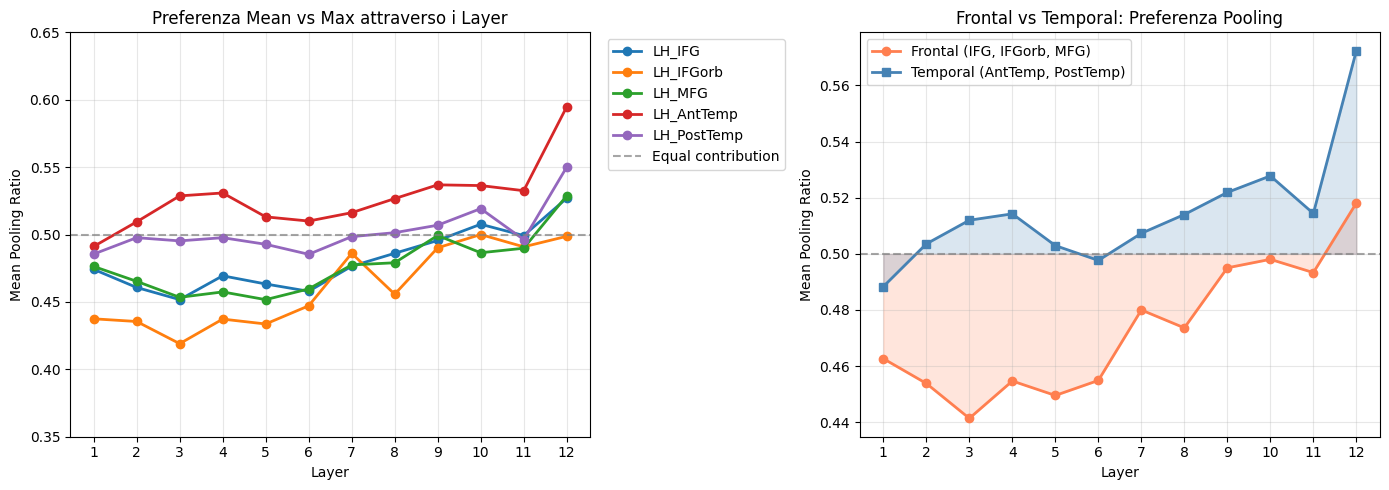


TEST STATISTICI: Mean vs Max per ROI (aggregando layer)

LH_IFG:
  Mean importance (avg): 0.01
  Max importance (avg):  0.01
  Direction: MAX > MEAN
  Wilcoxon p-value: 0.0522 

LH_IFGorb:
  Mean importance (avg): 0.01
  Max importance (avg):  0.01
  Direction: MAX > MEAN
  Wilcoxon p-value: 0.0005 *

LH_MFG:
  Mean importance (avg): 0.01
  Max importance (avg):  0.01
  Direction: MAX > MEAN
  Wilcoxon p-value: 0.0122 *

LH_AntTemp:
  Mean importance (avg): 0.05
  Max importance (avg):  0.05
  Direction: MEAN > MAX
  Wilcoxon p-value: 0.0010 *

LH_PostTemp:
  Mean importance (avg): 0.04
  Max importance (avg):  0.04
  Direction: MEAN > MAX
  Wilcoxon p-value: 0.5693 


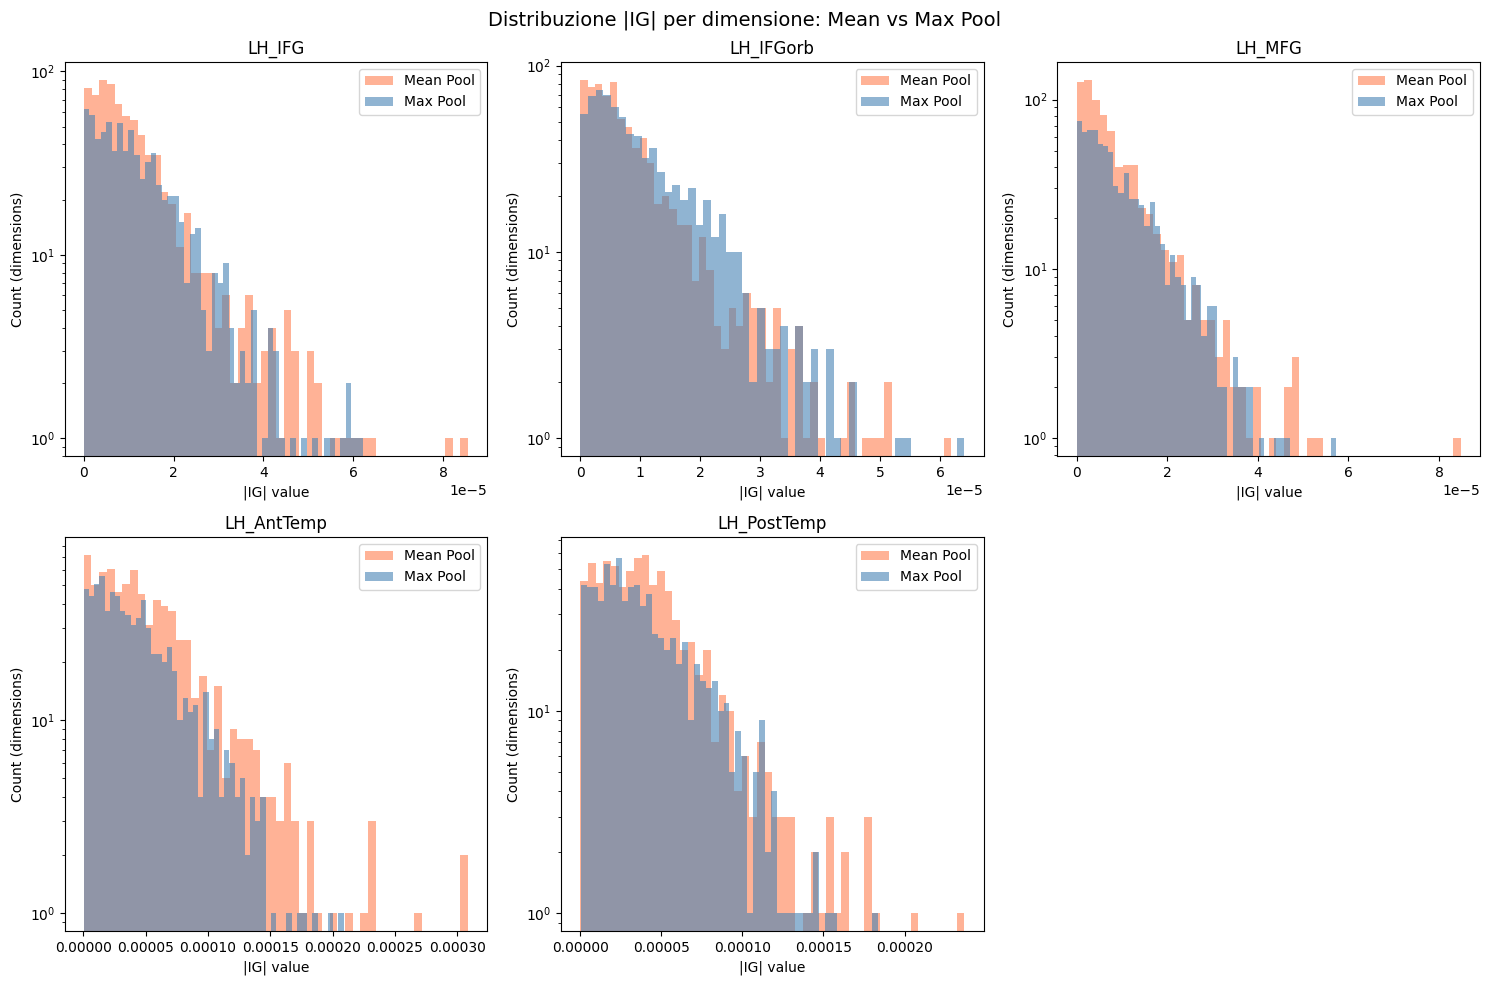


TOP-K OVERLAP: Mean vs Max condividono le stesse dimensioni importanti?
LH_IFG: Jaccard medio top-50 = 0.105 (std=0.033)
LH_IFGorb: Jaccard medio top-50 = 0.095 (std=0.023)
LH_MFG: Jaccard medio top-50 = 0.125 (std=0.036)
LH_AntTemp: Jaccard medio top-50 = 0.108 (std=0.039)
LH_PostTemp: Jaccard medio top-50 = 0.092 (std=0.042)


In [12]:
# =============================================================================
# ANALISI 1: MEAN vs MAX POOLING
# =============================================================================

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------------------------------------------------------
# 1. Caricamento e strutturazione dati
# -----------------------------------------------------------------------------


ROIS = ['LH_IFGorb', 'LH_IFG', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp']
LAYERS = [f'layer_{i}' for i in range(1, 13)]
N_DIM = 768  # dimensioni per pooling type

# Struttura dati più maneggevole
data = {}
for layer in LAYERS:
    for roi in ROIS:
        ig_vector = all_igs[layer][roi]  # shape (1536,)
        data[(layer, roi)] = {
            'full': ig_vector,
            'mean_pool': ig_vector[:N_DIM],
            'max_pool': ig_vector[N_DIM:]
        }

# -----------------------------------------------------------------------------
# 2. Calcolo importanza aggregata per pooling type
# -----------------------------------------------------------------------------

# Usiamo somma dei valori assoluti come misura di importanza totale
results = []

for layer in LAYERS:
    layer_num = int(layer.split('_')[1])
    for roi in ROIS:
        mean_imp = np.abs(data[(layer, roi)]['mean_pool']).sum()
        max_imp = np.abs(data[(layer, roi)]['max_pool']).sum()
        total_imp = mean_imp + max_imp
        
        results.append({
            'layer': layer_num,
            'roi': roi,
            'mean_importance': mean_imp,
            'max_importance': max_imp,
            'total_importance': total_imp,
            'mean_ratio': mean_imp / total_imp,
            'max_ratio': max_imp / total_imp,
            'mean_minus_max': mean_imp - max_imp,
            'log_ratio': np.log2(mean_imp / max_imp)  # >0 = mean domina, <0 = max domina
        })

df = pd.DataFrame(results)
print(df.head(10))

# -----------------------------------------------------------------------------
# 3. VISUALIZZAZIONE A: Heatmap Mean Ratio (ROI x Layer)
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pivot per heatmap
pivot_mean_ratio = df.pivot(index='roi', columns='layer', values='mean_ratio')

# Ordina ROI per interpretabilità (frontali in alto, temporali in basso)
roi_order = ['LH_IFG', 'LH_IFGorb', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp']
pivot_mean_ratio = pivot_mean_ratio.reindex(roi_order)

# Heatmap 1: Proporzione Mean
ax1 = axes[0]
sns.heatmap(pivot_mean_ratio, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0.5, vmin=0.3, vmax=0.7, ax=ax1)
ax1.set_title('Mean Pooling Ratio\n(>0.5 = Mean domina)', fontsize=12)
ax1.set_xlabel('Layer')
ax1.set_ylabel('ROI')

# Heatmap 2: Log Ratio (più sensibile alle differenze)
pivot_log_ratio = df.pivot(index='roi', columns='layer', values='log_ratio')
pivot_log_ratio = pivot_log_ratio.reindex(roi_order)

ax2 = axes[1]
sns.heatmap(pivot_log_ratio, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=ax2)
ax2.set_title('Log₂(Mean/Max)\n(>0 = Mean, <0 = Max)', fontsize=12)
ax2.set_xlabel('Layer')
ax2.set_ylabel('ROI')

# Heatmap 3: Importanza totale (per contesto)
pivot_total = df.pivot(index='roi', columns='layer', values='total_importance')
pivot_total = pivot_total.reindex(roi_order)

ax3 = axes[2]
sns.heatmap(pivot_total, annot=True, fmt='.1f', cmap='viridis', ax=ax3)
ax3.set_title('Total IG Importance\n(somma |IG|)', fontsize=12)
ax3.set_xlabel('Layer')
ax3.set_ylabel('ROI')

plt.tight_layout()
plt.savefig('pooling_heatmaps.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 4. VISUALIZZAZIONE B: Line plot layer-wise per ROI
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Mean ratio attraverso i layer, una linea per ROI
ax1 = axes[0]
for roi in roi_order:
    roi_data = df[df['roi'] == roi]
    ax1.plot(roi_data['layer'], roi_data['mean_ratio'], 'o-', label=roi, linewidth=2)

ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Equal contribution')
ax1.set_xlabel('Layer')
ax1.set_ylabel('Mean Pooling Ratio')
ax1.set_title('Preferenza Mean vs Max attraverso i Layer')
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.set_xticks(range(1, 13))
ax1.set_ylim(0.35, 0.65)
ax1.grid(True, alpha=0.3)

# Plot 2: Confronto frontale vs temporale
ax2 = axes[1]
frontal_rois = ['LH_IFG', 'LH_IFGorb', 'LH_MFG']
temporal_rois = ['LH_AntTemp', 'LH_PostTemp']

frontal_mean = df[df['roi'].isin(frontal_rois)].groupby('layer')['mean_ratio'].mean()
temporal_mean = df[df['roi'].isin(temporal_rois)].groupby('layer')['mean_ratio'].mean()

ax2.plot(range(1, 13), frontal_mean.values, 'o-', label='Frontal (IFG, IFGorb, MFG)', 
         linewidth=2, color='coral')
ax2.plot(range(1, 13), temporal_mean.values, 's-', label='Temporal (AntTemp, PostTemp)', 
         linewidth=2, color='steelblue')
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
ax2.fill_between(range(1, 13), frontal_mean.values, 0.5, alpha=0.2, color='coral')
ax2.fill_between(range(1, 13), temporal_mean.values, 0.5, alpha=0.2, color='steelblue')

ax2.set_xlabel('Layer')
ax2.set_ylabel('Mean Pooling Ratio')
ax2.set_title('Frontal vs Temporal: Preferenza Pooling')
ax2.legend()
ax2.set_xticks(range(1, 13))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pooling_lineplot.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 5. TEST STATISTICI
# -----------------------------------------------------------------------------

print("\n" + "="*60)
print("TEST STATISTICI: Mean vs Max per ROI (aggregando layer)")
print("="*60)

for roi in roi_order:
    roi_data = df[df['roi'] == roi]
    mean_vals = roi_data['mean_importance'].values
    max_vals = roi_data['max_importance'].values
    
    # Wilcoxon signed-rank test (paired, non-parametrico)
    stat, p_val = stats.wilcoxon(mean_vals, max_vals)
    
    # Direzione dell'effetto
    mean_avg = mean_vals.mean()
    max_avg = max_vals.mean()
    direction = "MEAN > MAX" if mean_avg > max_avg else "MAX > MEAN"
    
    print(f"\n{roi}:")
    print(f"  Mean importance (avg): {mean_avg:.2f}")
    print(f"  Max importance (avg):  {max_avg:.2f}")
    print(f"  Direction: {direction}")
    print(f"  Wilcoxon p-value: {p_val:.4f} {'*' if p_val < 0.05 else ''}")

# -----------------------------------------------------------------------------
# 6. DISTRIBUZIONE DIMENSIONALE: dove sono concentrate le IG?
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Per ogni ROI, mostra la distribuzione degli IG medi across layer
for idx, roi in enumerate(roi_order):
    ax = axes[idx]
    
    # Media degli IG across tutti i layer per questa ROI
    mean_igs_all_layers = np.mean([data[(f'layer_{l}', roi)]['mean_pool'] 
                                    for l in range(1, 13)], axis=0)
    max_igs_all_layers = np.mean([data[(f'layer_{l}', roi)]['max_pool'] 
                                   for l in range(1, 13)], axis=0)
    
    # Histogram sovrapposti
    ax.hist(np.abs(mean_igs_all_layers), bins=50, alpha=0.6, label='Mean Pool', color='coral')
    ax.hist(np.abs(max_igs_all_layers), bins=50, alpha=0.6, label='Max Pool', color='steelblue')
    ax.set_xlabel('|IG| value')
    ax.set_ylabel('Count (dimensions)')
    ax.set_title(f'{roi}')
    ax.legend()
    ax.set_yscale('log')

axes[5].axis('off')  # Nascondi il 6° subplot
plt.suptitle('Distribuzione |IG| per dimensione: Mean vs Max Pool', fontsize=14)
plt.tight_layout()
plt.savefig('pooling_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 7. TOP-K OVERLAP: le dimensioni importanti sono le stesse per mean e max?
# -----------------------------------------------------------------------------

print("\n" + "="*60)
print("TOP-K OVERLAP: Mean vs Max condividono le stesse dimensioni importanti?")
print("="*60)

K = 50  # top 50 dimensioni

for roi in roi_order:
    overlaps = []
    for layer in range(1, 13):
        mean_ig = np.abs(data[(f'layer_{layer}', roi)]['mean_pool'])
        max_ig = np.abs(data[(f'layer_{layer}', roi)]['max_pool'])
        
        top_mean = set(np.argsort(mean_ig)[-K:])
        top_max = set(np.argsort(max_ig)[-K:])
        
        jaccard = len(top_mean & top_max) / len(top_mean | top_max)
        overlaps.append(jaccard)
    
    print(f"{roi}: Jaccard medio top-{K} = {np.mean(overlaps):.3f} (std={np.std(overlaps):.3f})")

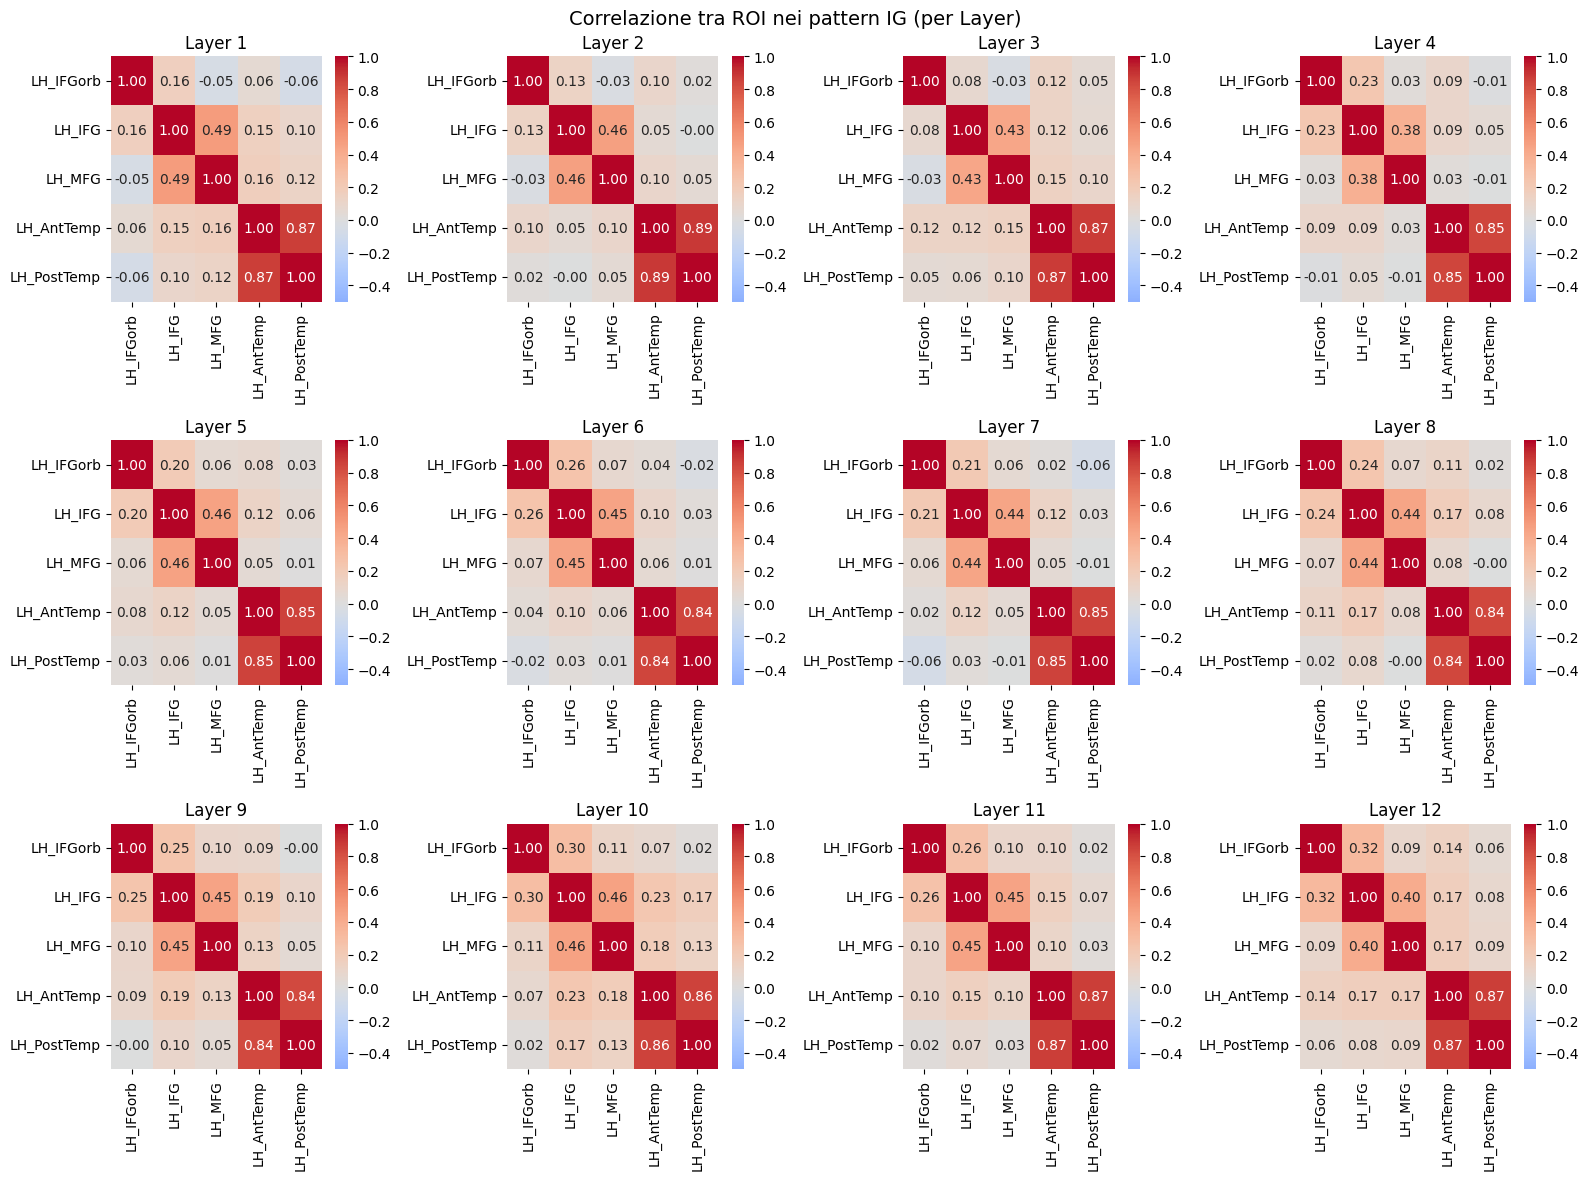

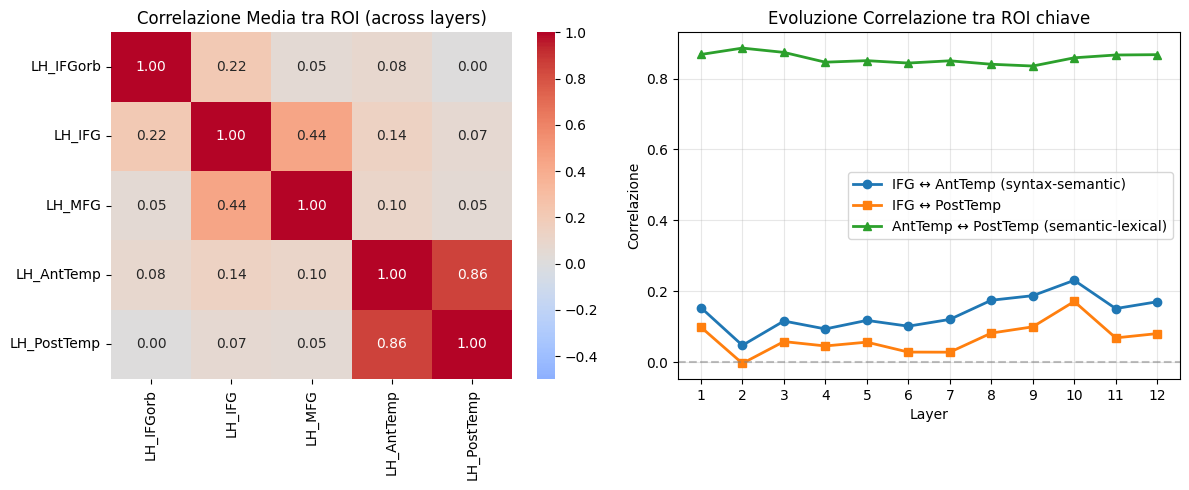


Correlazione media IFG ↔ AntTemp: 0.138
Correlazione media AntTemp ↔ PostTemp: 0.858


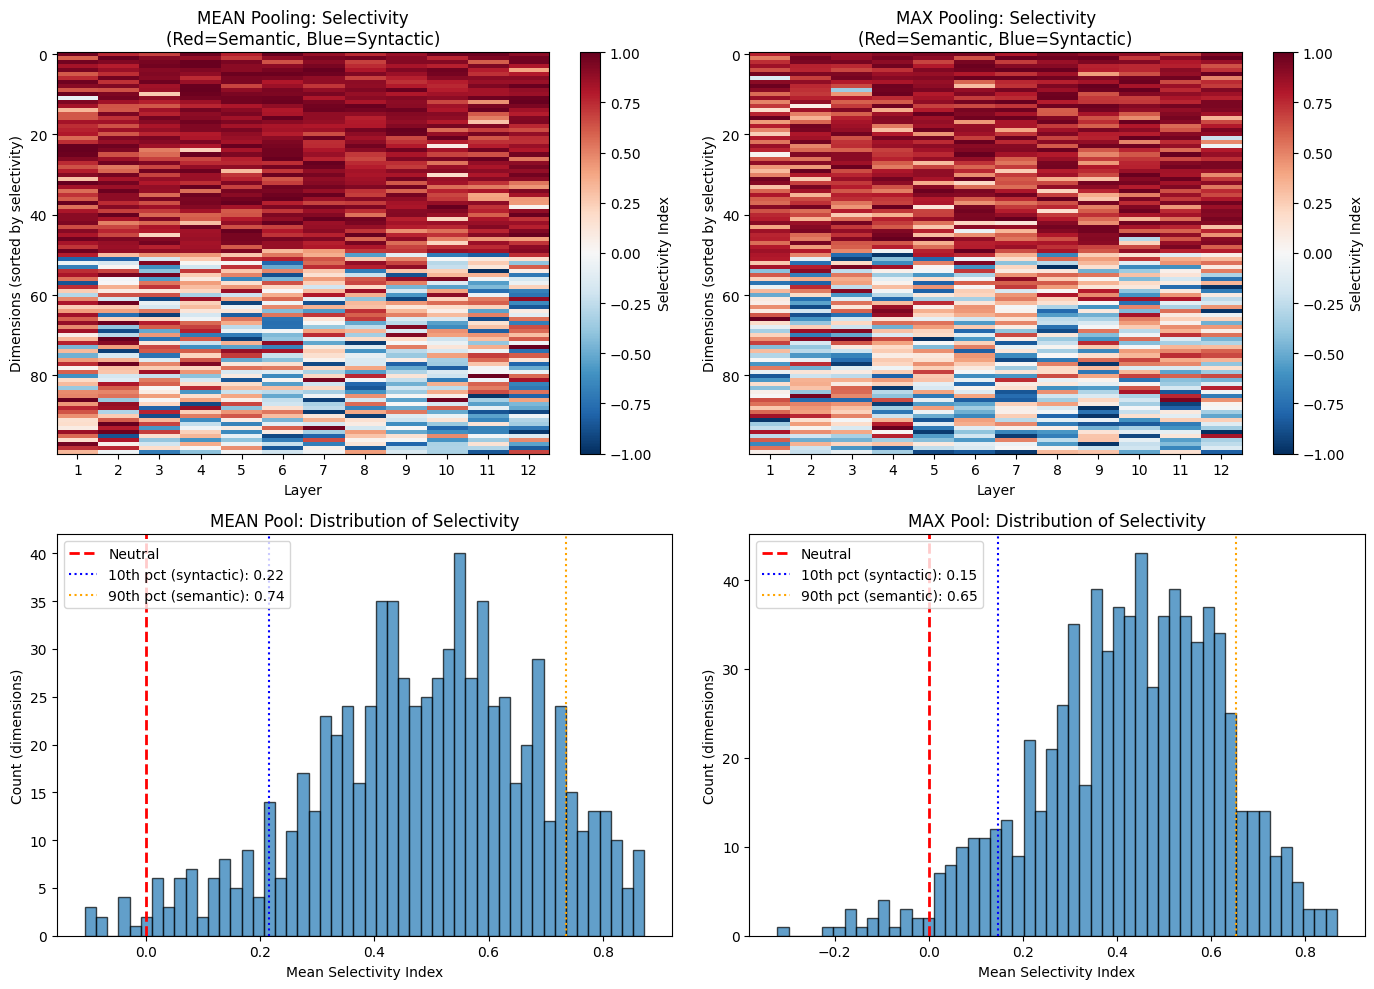


TOP DIMENSIONI PER SELECTIVITY (media across layers)

MEAN POOLING:
----------------------------------------
Top 10 SEMANTIC dimensions (high AntTemp, low IFG):
  Dim 762: selectivity = 0.873
  Dim 64: selectivity = 0.873
  Dim 318: selectivity = 0.867
  Dim 271: selectivity = 0.866
  Dim 512: selectivity = 0.866
  Dim 295: selectivity = 0.863
  Dim 656: selectivity = 0.859
  Dim 442: selectivity = 0.859
  Dim 681: selectivity = 0.855
  Dim 232: selectivity = 0.852

Top 10 SYNTACTIC dimensions (high IFG, low AntTemp):
  Dim 172: selectivity = -0.107
  Dim 457: selectivity = -0.103
  Dim 532: selectivity = -0.095
  Dim 394: selectivity = -0.075
  Dim 460: selectivity = -0.071
  Dim 0: selectivity = -0.039
  Dim 752: selectivity = -0.038
  Dim 148: selectivity = -0.037
  Dim 683: selectivity = -0.037
  Dim 98: selectivity = -0.029

MAX POOLING:
----------------------------------------
Top 10 SEMANTIC dimensions (high AntTemp, low IFG):
  Dim 372: selectivity = 0.868
  Dim 267: selectivi

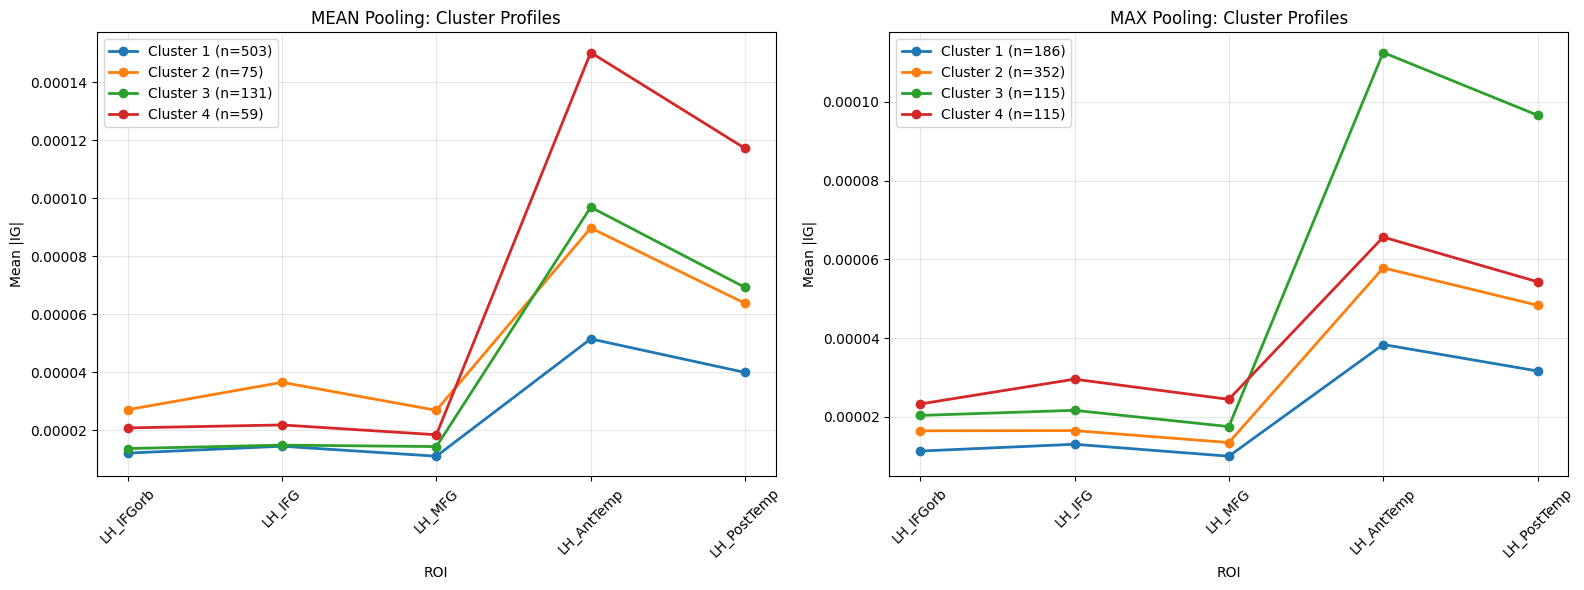

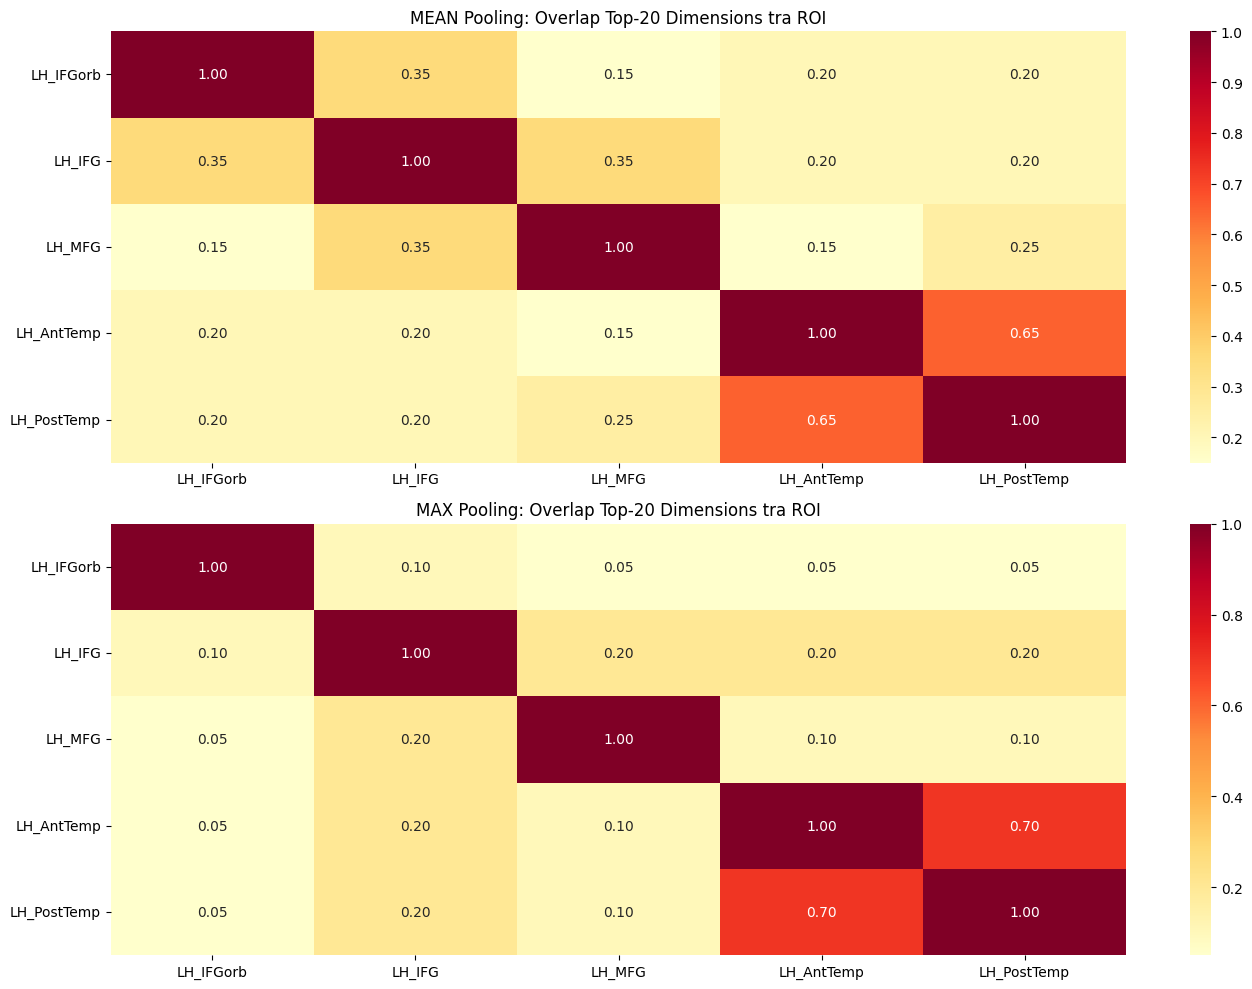

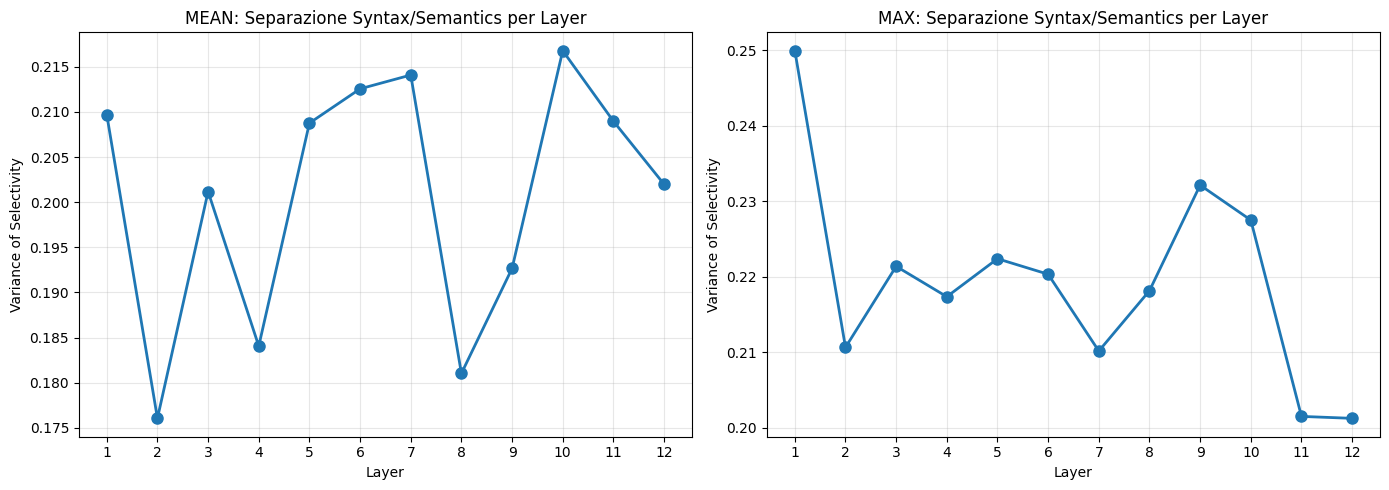


SUMMARY: Separazione Sintassi/Semantica

MEAN POOLING:
  Dimensioni 'sintattiche' (selectivity < -0.2): 0 (0.0%)
  Dimensioni 'semantiche' (selectivity > 0.2): 703 (91.5%)
  Dimensioni 'neutre' (-0.2 <= sel <= 0.2): 65 (8.5%)

MAX POOLING:
  Dimensioni 'sintattiche' (selectivity < -0.2): 2 (0.3%)
  Dimensioni 'semantiche' (selectivity > 0.2): 667 (86.8%)
  Dimensioni 'neutre' (-0.2 <= sel <= 0.2): 99 (12.9%)


In [39]:
# =============================================================================
# ANALISI 2: DIMENSIONI SINTATTICHE vs SEMANTICHE
# =============================================================================

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



ROIS = ['LH_IFGorb', 'LH_IFG', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp']
LAYERS = [f'layer_{i}' for i in range(1, 13)]
N_DIM = 768

# Classificazione funzionale delle ROI
SYNTACTIC_ROIS = ['LH_IFG']  # Core syntax
SEMANTIC_ROIS = ['LH_AntTemp']  # Core semantics
MIXED_ROIS = ['LH_IFGorb', 'LH_MFG', 'LH_PostTemp']  # Mixed/other functions

# Riorganizza dati: per ogni dimensione, il suo profilo IG across ROI e layer
data = {}
for layer in LAYERS:
    for roi in ROIS:
        data[(layer, roi)] = all_igs[layer][roi]

# -----------------------------------------------------------------------------
# 2. CORRELAZIONE TRA ROI (per layer)
# Domanda: quanto sono simili i pattern di IG tra ROI diverse?
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

corr_matrices = {}

for idx, layer in enumerate(LAYERS):
    # Estrai vettori IG per ogni ROI (full 1536 dim)
    roi_vectors = np.array([data[(layer, roi)] for roi in ROIS])
    
    # Correlazione tra ROI
    corr_matrix = np.corrcoef(roi_vectors)
    corr_matrices[layer] = corr_matrix
    
    ax = axes[idx]
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=ROIS, yticklabels=ROIS, ax=ax,
                vmin=-0.5, vmax=1, center=0)
    ax.set_title(f'Layer {idx+1}')
    
plt.suptitle('Correlazione tra ROI nei pattern IG (per Layer)', fontsize=14)
plt.tight_layout()
plt.savefig('roi_correlation_by_layer.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 3. CORRELAZIONE MEDIA ACROSS LAYERS + FOCUS IFG vs AntTemp
# -----------------------------------------------------------------------------

# Media delle correlazioni across layer
mean_corr = np.mean([corr_matrices[layer] for layer in LAYERS], axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap correlazione media
ax1 = axes[0]
sns.heatmap(mean_corr, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=ROIS, yticklabels=ROIS, ax=ax1,
            vmin=-0.5, vmax=1, center=0)
ax1.set_title('Correlazione Media tra ROI (across layers)')

# Evoluzione correlazione IFG-AntTemp through layers
ax2 = axes[1]
ifg_idx = ROIS.index('LH_IFG')
anttemp_idx = ROIS.index('LH_AntTemp')

corr_ifg_anttemp = [corr_matrices[f'layer_{l}'][ifg_idx, anttemp_idx] for l in range(1, 13)]
corr_ifg_posttemp = [corr_matrices[f'layer_{l}'][ifg_idx, ROIS.index('LH_PostTemp')] for l in range(1, 13)]
corr_anttemp_posttemp = [corr_matrices[f'layer_{l}'][anttemp_idx, ROIS.index('LH_PostTemp')] for l in range(1, 13)]

ax2.plot(range(1, 13), corr_ifg_anttemp, 'o-', label='IFG ↔ AntTemp (syntax-semantic)', linewidth=2)
ax2.plot(range(1, 13), corr_ifg_posttemp, 's-', label='IFG ↔ PostTemp', linewidth=2)
ax2.plot(range(1, 13), corr_anttemp_posttemp, '^-', label='AntTemp ↔ PostTemp (semantic-lexical)', linewidth=2)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Layer')
ax2.set_ylabel('Correlazione')
ax2.set_title('Evoluzione Correlazione tra ROI chiave')
ax2.legend()
ax2.set_xticks(range(1, 13))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roi_correlation_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nCorrelazione media IFG ↔ AntTemp:", np.mean(corr_ifg_anttemp).round(3))
print("Correlazione media AntTemp ↔ PostTemp:", np.mean(corr_anttemp_posttemp).round(3))

# -----------------------------------------------------------------------------
# 4. IDENTIFICAZIONE DIMENSIONI SELETTIVE
# Dimensioni con alto IG per IFG ma basso per AntTemp = "sintattiche"
# Dimensioni con alto IG per AntTemp ma basso per IFG = "semantiche"
# -----------------------------------------------------------------------------

def compute_selectivity(layer, pooling='both'):
    """
    Calcola selectivity index per ogni dimensione:
    Positive = più importante per AntTemp (semantic)
    Negative = più importante per IFG (syntactic)
    """
    ig_ifg = data[(layer, 'LH_IFG')]
    ig_anttemp = data[(layer, 'LH_AntTemp')]
    
    if pooling == 'mean':
        ig_ifg = ig_ifg[:N_DIM]
        ig_anttemp = ig_anttemp[:N_DIM]
    elif pooling == 'max':
        ig_ifg = ig_ifg[N_DIM:]
        ig_anttemp = ig_anttemp[N_DIM:]
    
    # Usa valori assoluti per l'importanza
    abs_ifg = np.abs(ig_ifg)
    abs_anttemp = np.abs(ig_anttemp)
    
    # Selectivity: (AntTemp - IFG) / (AntTemp + IFG + epsilon)
    epsilon = 1e-10
    selectivity = (abs_anttemp - abs_ifg) / (abs_anttemp + abs_ifg + epsilon)
    
    return selectivity

# Calcola selectivity per ogni layer e pooling type
selectivity_results = {}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for pooling_idx, pooling in enumerate(['mean', 'max']):
    
    selectivity_matrix = np.zeros((12, N_DIM))
    
    for l in range(1, 13):
        selectivity_matrix[l-1] = compute_selectivity(f'layer_{l}', pooling)
    
    selectivity_results[pooling] = selectivity_matrix
    
    # Heatmap: dimensioni x layer
    ax = axes[0, pooling_idx]
    
    # Ordina dimensioni per selectivity media (semantic in alto, syntactic in basso)
    mean_selectivity = selectivity_matrix.mean(axis=0)
    sorted_idx = np.argsort(mean_selectivity)[::-1]
    
    # Mostra solo subset per visualizzazione
    n_show = 100  # top e bottom 50
    idx_to_show = np.concatenate([sorted_idx[:50], sorted_idx[-50:]])
    
    im = ax.imshow(selectivity_matrix[:, idx_to_show].T, aspect='auto', 
                   cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Dimensions (sorted by selectivity)')
    ax.set_title(f'{pooling.upper()} Pooling: Selectivity\n(Red=Semantic, Blue=Syntactic)')
    ax.set_xticks(range(12))
    ax.set_xticklabels(range(1, 13))
    plt.colorbar(im, ax=ax, label='Selectivity Index')

# Distribuzione della selectivity
for pooling_idx, pooling in enumerate(['mean', 'max']):
    ax = axes[1, pooling_idx]
    
    # Selectivity media across layers per ogni dimensione
    mean_sel = selectivity_results[pooling].mean(axis=0)
    
    ax.hist(mean_sel, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
    ax.axvline(x=np.percentile(mean_sel, 10), color='blue', linestyle=':', 
               label=f'10th pct (syntactic): {np.percentile(mean_sel, 10):.2f}')
    ax.axvline(x=np.percentile(mean_sel, 90), color='orange', linestyle=':', 
               label=f'90th pct (semantic): {np.percentile(mean_sel, 90):.2f}')
    ax.set_xlabel('Mean Selectivity Index')
    ax.set_ylabel('Count (dimensions)')
    ax.set_title(f'{pooling.upper()} Pool: Distribution of Selectivity')
    ax.legend()

plt.tight_layout()
plt.savefig('dimension_selectivity.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 5. TOP DIMENSIONI SINTATTICHE vs SEMANTICHE
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("TOP DIMENSIONI PER SELECTIVITY (media across layers)")
print("="*70)

for pooling in ['mean', 'max']:
    mean_sel = selectivity_results[pooling].mean(axis=0)
    
    print(f"\n{pooling.upper()} POOLING:")
    print("-" * 40)
    
    # Top semantic (high positive selectivity)
    top_semantic = np.argsort(mean_sel)[-10:][::-1]
    print(f"Top 10 SEMANTIC dimensions (high AntTemp, low IFG):")
    for dim in top_semantic:
        print(f"  Dim {dim}: selectivity = {mean_sel[dim]:.3f}")
    
    # Top syntactic (high negative selectivity)
    top_syntactic = np.argsort(mean_sel)[:10]
    print(f"\nTop 10 SYNTACTIC dimensions (high IFG, low AntTemp):")
    for dim in top_syntactic:
        print(f"  Dim {dim}: selectivity = {mean_sel[dim]:.3f}")

# -----------------------------------------------------------------------------
# 6. CLUSTERING DELLE DIMENSIONI basato sul profilo ROI
# -----------------------------------------------------------------------------

# Per ogni dimensione, crea un profilo: IG per ogni ROI (mediato across layers)
# Usiamo solo mean pooling per semplicità (o puoi fare entrambi)

def create_dimension_profiles(pooling='mean'):
    """
    Per ogni dimensione, il suo profilo = [IG_medio per ROI1, ROI2, ..., ROI5]
    """
    profiles = np.zeros((N_DIM, len(ROIS)))
    
    for roi_idx, roi in enumerate(ROIS):
        # Media across layers
        roi_igs = []
        for l in range(1, 13):
            ig = data[(f'layer_{l}', roi)]
            if pooling == 'mean':
                ig = ig[:N_DIM]
            else:
                ig = ig[N_DIM:]
            roi_igs.append(np.abs(ig))
        
        profiles[:, roi_idx] = np.mean(roi_igs, axis=0)
    
    return profiles

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for pooling_idx, pooling in enumerate(['mean', 'max']):
    profiles = create_dimension_profiles(pooling)
    
    # Standardizza per clustering
    scaler = StandardScaler()
    profiles_scaled = scaler.fit_transform(profiles)
    
    # Hierarchical clustering
    linkage_matrix = linkage(profiles_scaled, method='ward')
    
    # Taglia in k cluster
    n_clusters = 4
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Profilo medio per cluster
    ax = axes[pooling_idx]
    
    cluster_profiles = []
    for c in range(1, n_clusters + 1):
        mask = cluster_labels == c
        cluster_mean = profiles[mask].mean(axis=0)
        cluster_profiles.append(cluster_mean)
        ax.plot(ROIS, cluster_mean, 'o-', label=f'Cluster {c} (n={mask.sum()})', linewidth=2)
    
    ax.set_xlabel('ROI')
    ax.set_ylabel('Mean |IG|')
    ax.set_title(f'{pooling.upper()} Pooling: Cluster Profiles')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dimension_clusters.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 7. HEATMAP DETTAGLIATA: Top dimensions per ogni ROI
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for pooling_idx, pooling in enumerate(['mean', 'max']):
    profiles = create_dimension_profiles(pooling)
    
    # Per ogni ROI, trova le top-20 dimensioni
    top_k = 20
    top_dims_per_roi = {}
    
    for roi_idx, roi in enumerate(ROIS):
        top_dims_per_roi[roi] = set(np.argsort(profiles[:, roi_idx])[-top_k:])
    
    # Crea matrice di overlap
    overlap_matrix = np.zeros((len(ROIS), len(ROIS)))
    for i, roi1 in enumerate(ROIS):
        for j, roi2 in enumerate(ROIS):
            overlap = len(top_dims_per_roi[roi1] & top_dims_per_roi[roi2])
            overlap_matrix[i, j] = overlap / top_k  # Normalizza
    
    ax = axes[pooling_idx]
    sns.heatmap(overlap_matrix, annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=ROIS, yticklabels=ROIS, ax=ax)
    ax.set_title(f'{pooling.upper()} Pooling: Overlap Top-{top_k} Dimensions tra ROI')

plt.tight_layout()
plt.savefig('top_dimensions_overlap.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 8. EVOLUZIONE LAYER-BY-LAYER della separazione syntax/semantics
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for pooling_idx, pooling in enumerate(['mean', 'max']):
    ax = axes[pooling_idx]
    
    # Per ogni layer, calcola quanto sono separate le dimensioni syntax vs semantic
    separation_scores = []
    
    for l in range(1, 13):
        sel = compute_selectivity(f'layer_{l}', pooling)
        
        # Misura: varianza della selectivity (più alta = più separazione)
        separation_scores.append(np.var(sel))
    
    ax.plot(range(1, 13), separation_scores, 'o-', linewidth=2, markersize=8)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Variance of Selectivity')
    ax.set_title(f'{pooling.upper()}: Separazione Syntax/Semantics per Layer')
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('selectivity_variance_by_layer.png', dpi=150, bbox_inches='tight')
plt.show()

# -----------------------------------------------------------------------------
# 9. SUMMARY STATISTICS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("SUMMARY: Separazione Sintassi/Semantica")
print("="*70)

for pooling in ['mean', 'max']:
    mean_sel = selectivity_results[pooling].mean(axis=0)
    
    n_syntactic = (mean_sel < -0.2).sum()
    n_semantic = (mean_sel > 0.2).sum()
    n_neutral = ((mean_sel >= -0.2) & (mean_sel <= 0.2)).sum()
    
    print(f"\n{pooling.upper()} POOLING:")
    print(f"  Dimensioni 'sintattiche' (selectivity < -0.2): {n_syntactic} ({100*n_syntactic/N_DIM:.1f}%)")
    print(f"  Dimensioni 'semantiche' (selectivity > 0.2): {n_semantic} ({100*n_semantic/N_DIM:.1f}%)")
    print(f"  Dimensioni 'neutre' (-0.2 <= sel <= 0.2): {n_neutral} ({100*n_neutral/N_DIM:.1f}%)")

# ANALY<E 2>

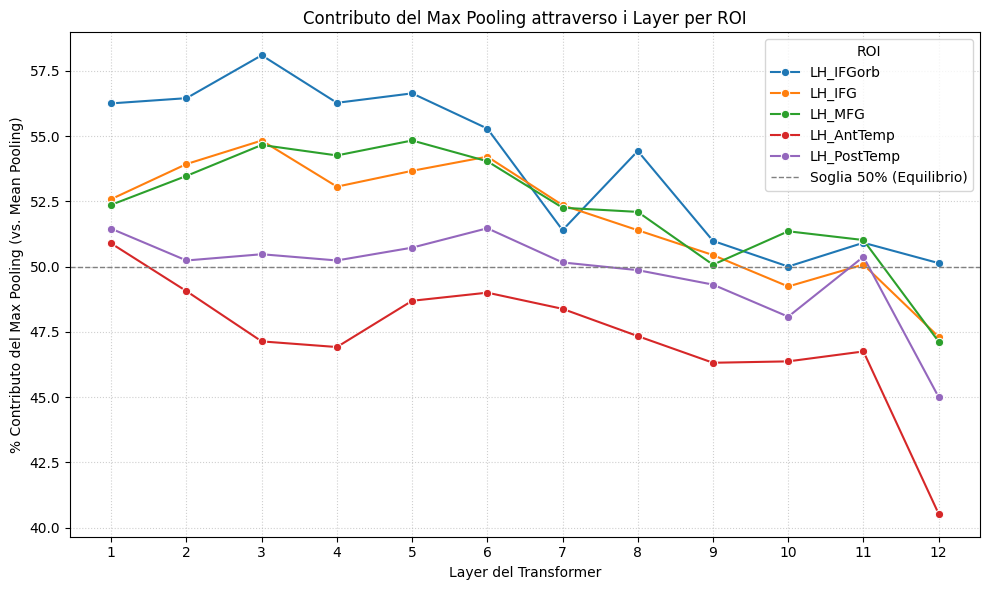

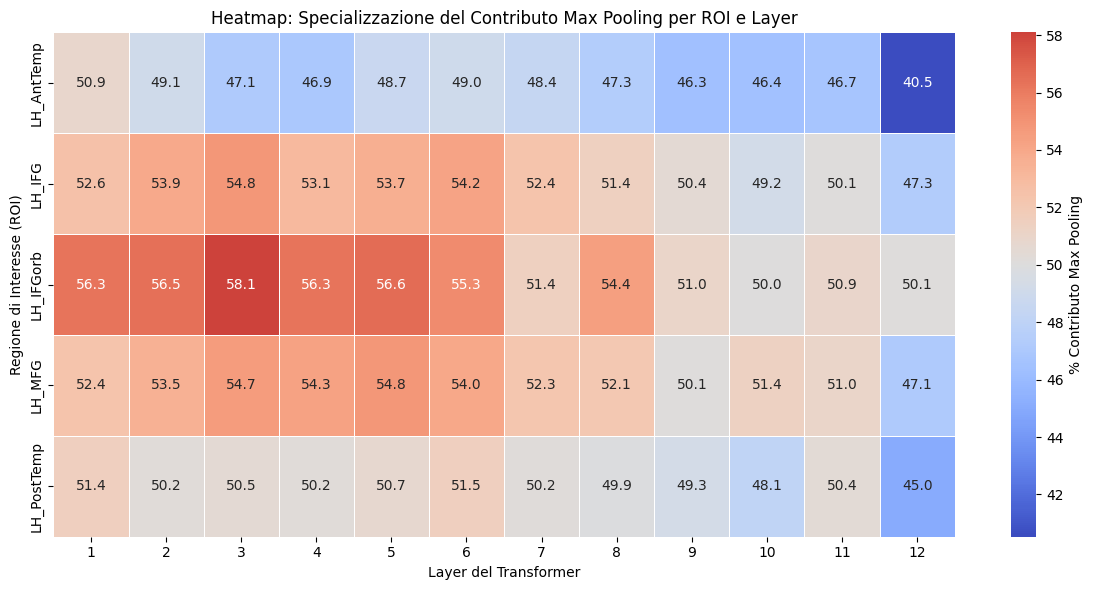

In [17]:
results = []
NUM_DIM_POOLING = 768

# Itera su tutti i Layer e ROI
for layer_key, roi_data in all_igs.items():
    layer_num = int(layer_key.split('_')[1])
    
    for roi_name, fim_vector in roi_data.items():
        # A. Normalizzazione L1 (prendiamo i valori assoluti per l'importanza)
        abs_fim = np.abs(fim_vector)
        sum_total_importance = np.sum(abs_fim)
        
        # Se la somma è zero (caso improbabile), usa un valore nullo o continua
        if sum_total_importance == 0:
            max_contrib = 50.0 # Valore neutro
        else:
            # B. Calcolo del Contributo di Pooling
            # Indici: Mean Pooling (0:768), Max Pooling (768:1536)
            
            # Contributo Mean Pooling (dimensioni 1-768)
            importance_mean = np.sum(abs_fim[:NUM_DIM_POOLING])
            
            # Contributo Max Pooling (dimensioni 769-1536)
            importance_max = np.sum(abs_fim[NUM_DIM_POOLING:])
            
            # Calcolo del contributo percentuale del MAX Pooling (più informativo come metrica singola)
            # La normalizzazione è implicita dividendo per la somma totale di importanza.
            max_contrib = (importance_max / sum_total_importance) * 100
        
        # Aggiungi il risultato alla lista
        results.append({
            'Layer': layer_num,
            'ROI': roi_name,
            'Max_Pooling_Contribution': max_contrib,
        })

# Creazione del DataFrame finale
df_results = pd.DataFrame(results)

# --- 2. Visualizzazione 1: Grafico a Linee Multiple (Analisi della Tendenza) ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='Layer', y='Max_Pooling_Contribution', hue='ROI', marker='o')

# Aggiunge la linea di riferimento per il 50%
plt.axhline(50, color='gray', linestyle='--', linewidth=1, label='Soglia 50% (Equilibrio)') 

plt.title('Contributo del Max Pooling attraverso i Layer per ROI')
plt.xlabel('Layer del Transformer')
plt.ylabel('% Contributo del Max Pooling (vs. Mean Pooling)')
plt.legend(title='ROI')
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# --- 3. Visualizzazione 2: Heatmap (Analisi della Specializzazione) ---

# Trasforma i risultati in un formato pivot per la heatmap (ROI vs. Layer)
df_heatmap = df_results.pivot(index='ROI', columns='Layer', values='Max_Pooling_Contribution')

plt.figure(figsize=(12, 6))

# Usa una colormap divergente centrata sul 50%
sns.heatmap(
    df_heatmap,
    annot=True,              # Mostra i valori numerici
    fmt=".1f",               # Formato con un decimale
    cmap='coolwarm',         # Colormap divergente (es. Blu/Rosso)
    center=50,               # Centro la colormap al 50%
    linewidths=.5,
    cbar_kws={'label': '% Contributo Max Pooling'}
)
plt.title('Heatmap: Specializzazione del Contributo Max Pooling per ROI e Layer')
plt.xlabel('Layer del Transformer')
plt.ylabel('Regione di Interesse (ROI)')
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_36440\393620701.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sig = df_p_value.applymap(lambda x: x < 0.05) # Matrice booleana per la significatività
C:\Users\andre\AppData\Local\Temp\ipykernel_36440\393620701.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=df_p_value.applymap(lambda x: f'{x:.3f}' if x < 0.05 else ''),


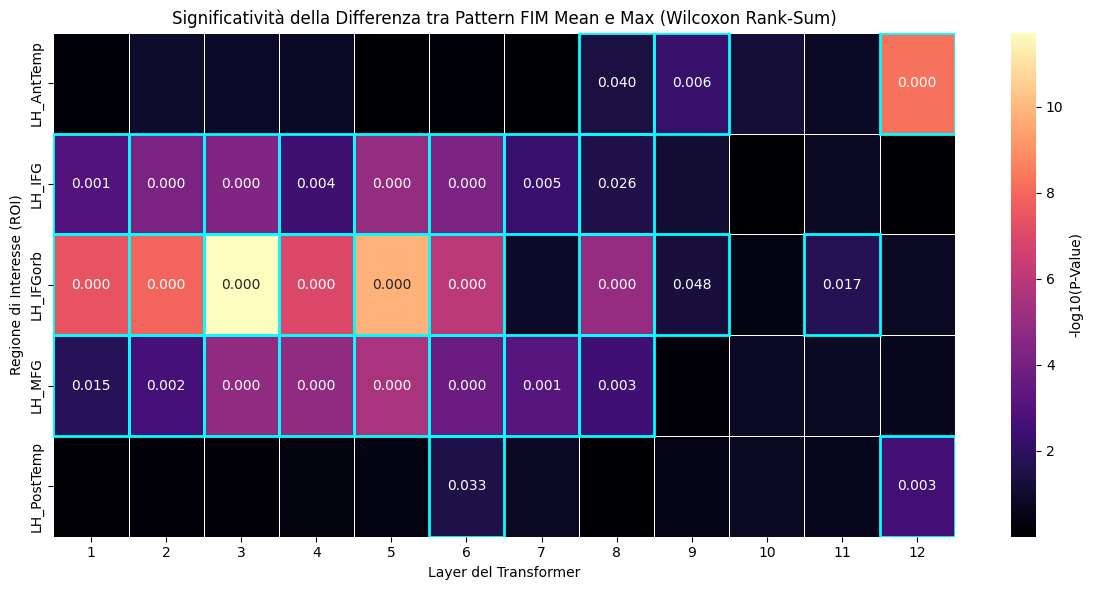


--- Tabella dei P-Value (Layer-Wise) ---
P < 0.05 indica una differenza significativa tra la distribuzione di importanza delle feature Mean e Max.
| ROI         |           1 |           2 |           3 |           4 |           5 |           6 |           7 |           8 |          9 |        10 |        11 |          12 |
|:------------|------------:|------------:|------------:|------------:|------------:|------------:|------------:|------------:|-----------:|----------:|----------:|------------:|
| LH_AntTemp  | 0.707011    | 0.11768     | 0.123737    | 0.146323    | 0.917895    | 0.709921    | 0.931694    | 0.0403992   | 0.00568968 | 0.0604303 | 0.13522   | 5.61944e-09 |
| LH_IFG      | 0.000973128 | 6.13712e-05 | 4.78666e-05 | 0.00368409  | 1.23853e-05 | 6.39931e-05 | 0.00464756  | 0.0256454   | 0.0861842  | 0.995869  | 0.149319  | 0.9435      |
| LH_IFGorb   | 4.05811e-08 | 1.07819e-08 | 1.88617e-12 | 1.07583e-07 | 1.44116e-10 | 9.04651e-07 | 0.131648    | 1.07264e-05 | 0.047647

In [21]:
NUM_DIM_POOLING = 768
statistical_results = []

# --- 1. Calcolo del P-Value (Wilcoxon Rank-Sum Test) Layer-by-Layer ---

for layer_key, roi_data in all_igs.items():
    # Estrae il numero del layer per l'asse X
    layer_num = int(layer_key.split('_')[1])
    
    for roi_name, fim_vector in roi_data.items():
        
        # A. Normalizzazione L1 del vettore FIM (Passo necessario per IG)
        abs_fim = np.abs(fim_vector)
        sum_total_importance = np.sum(abs_fim)
        
        if sum_total_importance == 0:
            p_value = 1.0
        else:
            # Vettore FIM normalizzato L1 (la somma dei valori assoluti è 1)
            fim_norm = abs_fim / sum_total_importance
            
            # B. Separazione dei FIM (i due campioni statistici da 768 dimensioni)
            mean_vals = fim_norm[:NUM_DIM_POOLING] 
            max_vals = fim_norm[NUM_DIM_POOLING:]  
            
            # C. Wilcoxon Rank-Sum Test (Ranksums)
            # Confronta le due distribuzioni (non accoppiate)
            try:
                # H0: Le distribuzioni di importanza Mean e Max sono uguali.
                # H1: Sono significativamente diverse (significa che Mean e Max estraggono pattern diversi).
                stat, p_value = ranksums(mean_vals, max_vals)
            except ValueError:
                # Gestisce casi degeneri
                p_value = 1.0

        statistical_results.append({
            'Layer': layer_num,
            'ROI': roi_name,
            'P_Value': p_value
        })

df_stats = pd.DataFrame(statistical_results)

# --- 2. Visualizzazione: Heatmap dei P-Values e Significatività ---

# Trasforma i P-value in un formato pivot per la heatmap
df_p_value = df_stats.pivot(index='ROI', columns='Layer', values='P_Value')
df_sig = df_p_value.applymap(lambda x: x < 0.05) # Matrice booleana per la significatività

plt.figure(figsize=(12, 6))

# Creazione della Heatmap
sns.heatmap(
    # Usa il negativo del log10 del P-Value per evidenziare i valori significativi
    -np.log10(df_p_value), 
    annot=df_p_value.applymap(lambda x: f'{x:.3f}' if x < 0.05 else ''),
    fmt='s',
    cmap='magma', # Colormap inversa: valori alti (vicini a 0) sono più caldi
    cbar_kws={'label': '-log10(P-Value)'},
    linewidths=.5,
    linecolor='white'
)

# Aggiunge un bordo (o un asterisco) per evidenziare le celle significative
for i in range(len(df_p_value.index)):
    for j in range(len(df_p_value.columns)):
        if df_sig.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='cyan', lw=2))


plt.title('Significatività della Differenza tra Pattern FIM Mean e Max (Wilcoxon Rank-Sum)')
plt.xlabel('Layer del Transformer')
plt.ylabel('Regione di Interesse (ROI)')
plt.tight_layout()
plt.show()

# --- 3. Stampa Tabella Riassuntiva ---

print("\n--- Tabella dei P-Value (Layer-Wise) ---")
print("P < 0.05 indica una differenza significativa tra la distribuzione di importanza delle feature Mean e Max.")
print(df_p_value.to_markdown())

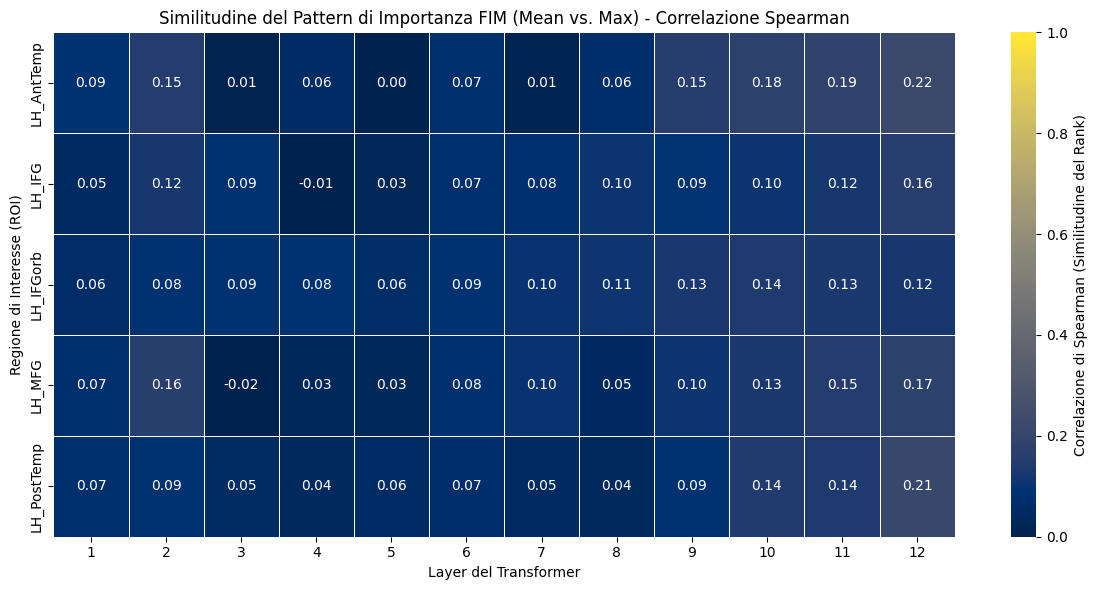

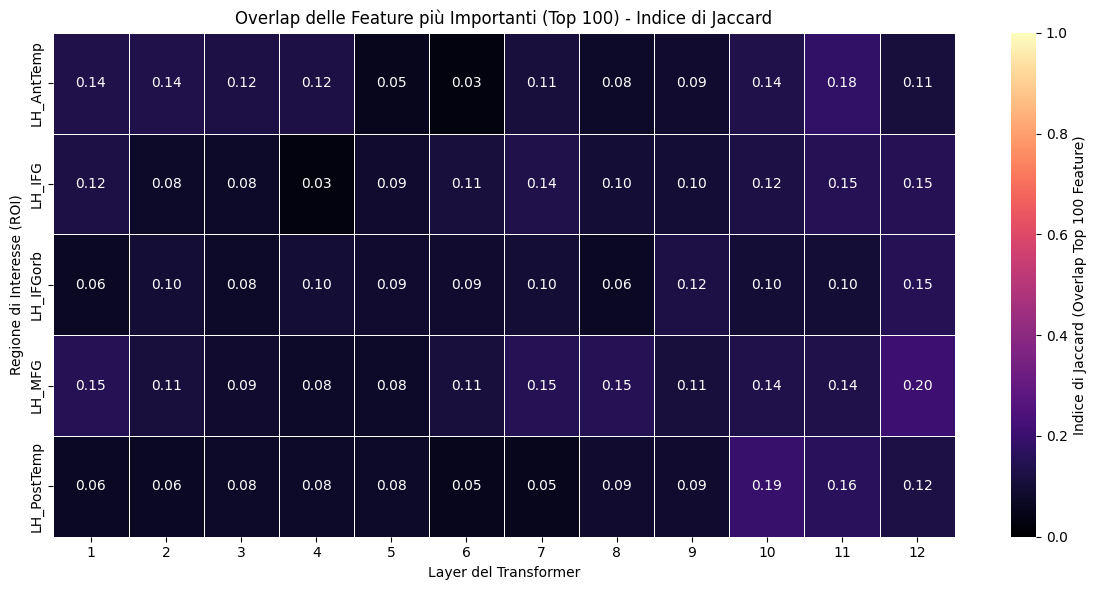

In [28]:
NUM_DIM_POOLING = 768
K_TOP_FEATURES = 100 # K richiesto per l'Indice di Jaccard
analysis_results = []

# --- 1. Calcolo di Correlazione e Jaccard Index ---

for layer_key, roi_data in all_igs.items():
    layer_num = int(layer_key.split('_')[1])
    
    for roi_name, fim_vector in roi_data.items():
        
        # A. Normalizzazione L1 del FIM (Valore Assoluto)
        abs_fim = np.abs(fim_vector)
        sum_total_importance = np.sum(abs_fim)
        
        if sum_total_importance == 0:
            spearman_corr = 0.0
            jaccard_index = 0.0
        else:
            fim_norm = abs_fim / sum_total_importance
            
            mean_vals = fim_norm[:NUM_DIM_POOLING] 
            max_vals = fim_norm[NUM_DIM_POOLING:]  
            
            # --- Calcolo Spearman Correlation ---
            spearman_corr, _ = spearmanr(mean_vals, max_vals)
            
            # --- Calcolo Jaccard Index (Overlap Top K) ---
            
            # 1. Ottieni gli indici delle Top K feature
            # np.argsort restituisce gli indici che ordinano i valori
            # [-K:] seleziona gli indici delle K feature più importanti
            top_k_mean_indices = set(np.argsort(mean_vals)[-K:])
            top_k_max_indices = set(np.argsort(max_vals)[-K:])
            
            # 2. Calcolo Overlap (Intersezione) e Unione
            intersection = top_k_mean_indices.intersection(top_k_max_indices)
            union = top_k_mean_indices.union(top_k_max_indices)
            
            # 3. Indice di Jaccard: Intersezione / Unione
            jaccard_index = len(intersection) / len(union)

        analysis_results.append({
            'Layer': layer_num,
            'ROI': roi_name,
            'Spearman_Correlation': spearman_corr,
            'Jaccard_Index': jaccard_index
        })

df_analysis = pd.DataFrame(analysis_results)

# --- 2. Visualizzazione 1: Heatmap della Correlazione di Spearman ---

df_heatmap_corr = df_analysis.pivot(index='ROI', columns='Layer', values='Spearman_Correlation')

plt.figure(figsize=(12, 6))
sns.heatmap(
    df_heatmap_corr,
    annot=True,
    fmt=".2f",
    cmap='cividis', # Colormap viridis per un contrasto sequenziale
    vmin=0,
    vmax=1,
    linewidths=.5,
    cbar_kws={'label': 'Correlazione di Spearman (Similitudine del Rank)'}
)
plt.title('Similitudine del Pattern di Importanza FIM (Mean vs. Max) - Correlazione Spearman')
plt.xlabel('Layer del Transformer')
plt.ylabel('Regione di Interesse (ROI)')
plt.tight_layout()
plt.show()

# --- 3. Visualizzazione 2: Heatmap dell'Indice di Jaccard ---

df_heatmap_jaccard = df_analysis.pivot(index='ROI', columns='Layer', values='Jaccard_Index')

plt.figure(figsize=(12, 6))
sns.heatmap(
    df_heatmap_jaccard,
    annot=True,
    fmt=".2f",
    cmap='magma', # Colormap sequenziale
    vmin=0,
    vmax=1,
    linewidths=.5,
    cbar_kws={'label': 'Indice di Jaccard (Overlap Top 100 Feature)'}
)
plt.title('Overlap delle Feature più Importanti (Top 100) - Indice di Jaccard')
plt.xlabel('Layer del Transformer')
plt.ylabel('Regione di Interesse (ROI)')
plt.tight_layout()
plt.show()

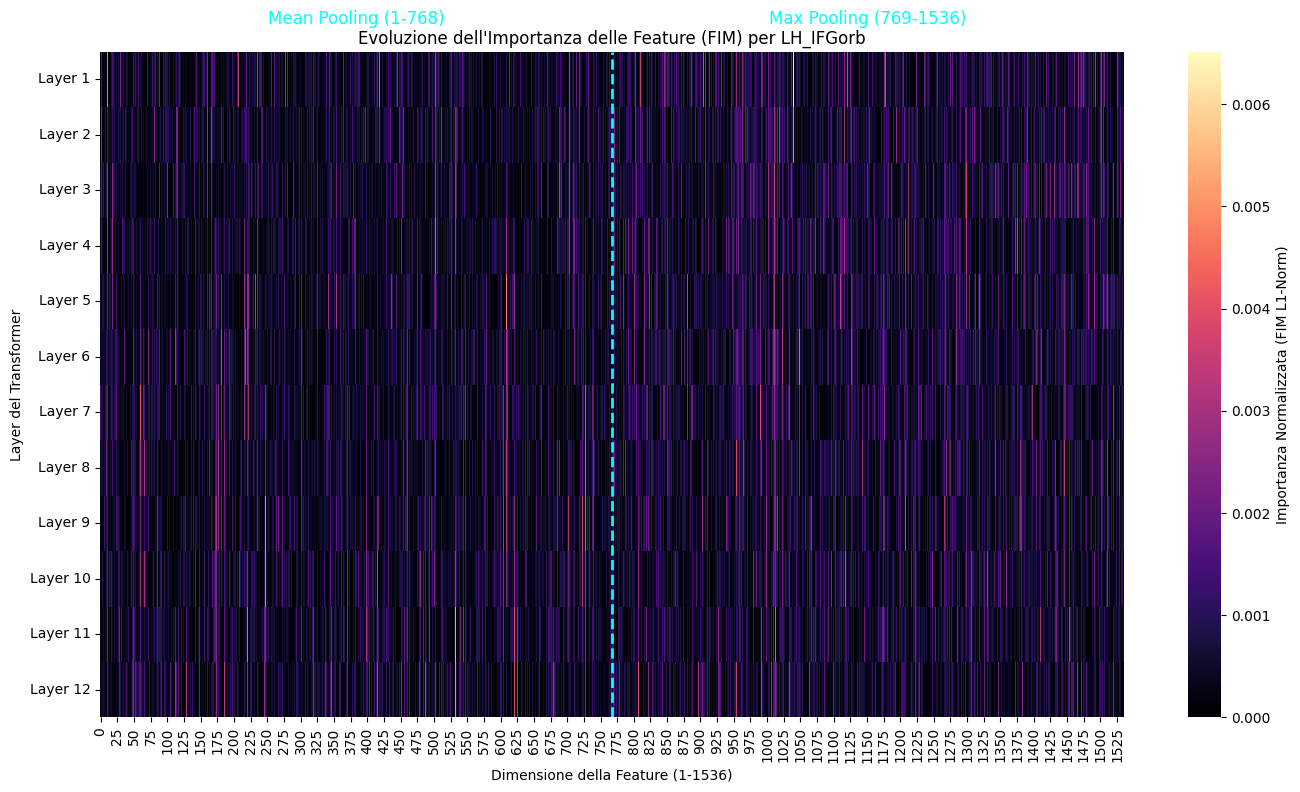

In [30]:
TARGET_ROI = 'LH_IFGorb' 

# Crea la matrice vuota: 12 Layers x 1536 Dimensioni
fim_matrix = np.zeros((12, 1536))
layers_list = [f'Layer {i}' for i in range(1, 13)]

for layer_num in range(1, 13):
    layer_key = f'layer_{layer_num}'
    
    # Estrai il vettore FIM a 1536 dimensioni (Valore Assoluto)
    fim_vector = all_igs[layer_key][TARGET_ROI]
    
    # Normalizzazione L1 del FIM (necessaria per confrontare l'importanza)
    abs_fim = np.abs(fim_vector)
    fim_norm = abs_fim / np.sum(abs_fim)
    
    fim_matrix[layer_num - 1, :] = fim_norm

# --- 2. Visualizzazione: Heatmap FIM Layer-Wise ---

plt.figure(figsize=(14, 8))

sns.heatmap(
    fim_matrix,
    cmap='magma', # Colormap per visualizzare l'importanza (scuro=basso, chiaro=alto)
    yticklabels=layers_list,
    cbar_kws={'label': 'Importanza Normalizzata (FIM L1-Norm)'},
    vmin=0 # Forziamo la scala a partire da zero
)

plt.title(f'Evoluzione dell\'Importanza delle Feature (FIM) per {TARGET_ROI}')
plt.ylabel('Layer del Transformer')
plt.xlabel('Dimensione della Feature (1-1536)')

# Aggiunge una linea verticale per separare Mean da Max Pooling
# La dimensione 768 separa Mean Pooling (1-768) da Max Pooling (769-1536)
plt.axvline(x=768, color='cyan', linestyle='--', linewidth=2, label='Separazione Pooling (768)')
plt.text(384, -0.5, 'Mean Pooling (1-768)', horizontalalignment='center', color='cyan', fontsize=12)
plt.text(768 + 384, -0.5, 'Max Pooling (769-1536)', horizontalalignment='center', color='cyan', fontsize=12)

plt.tight_layout()
plt.show()

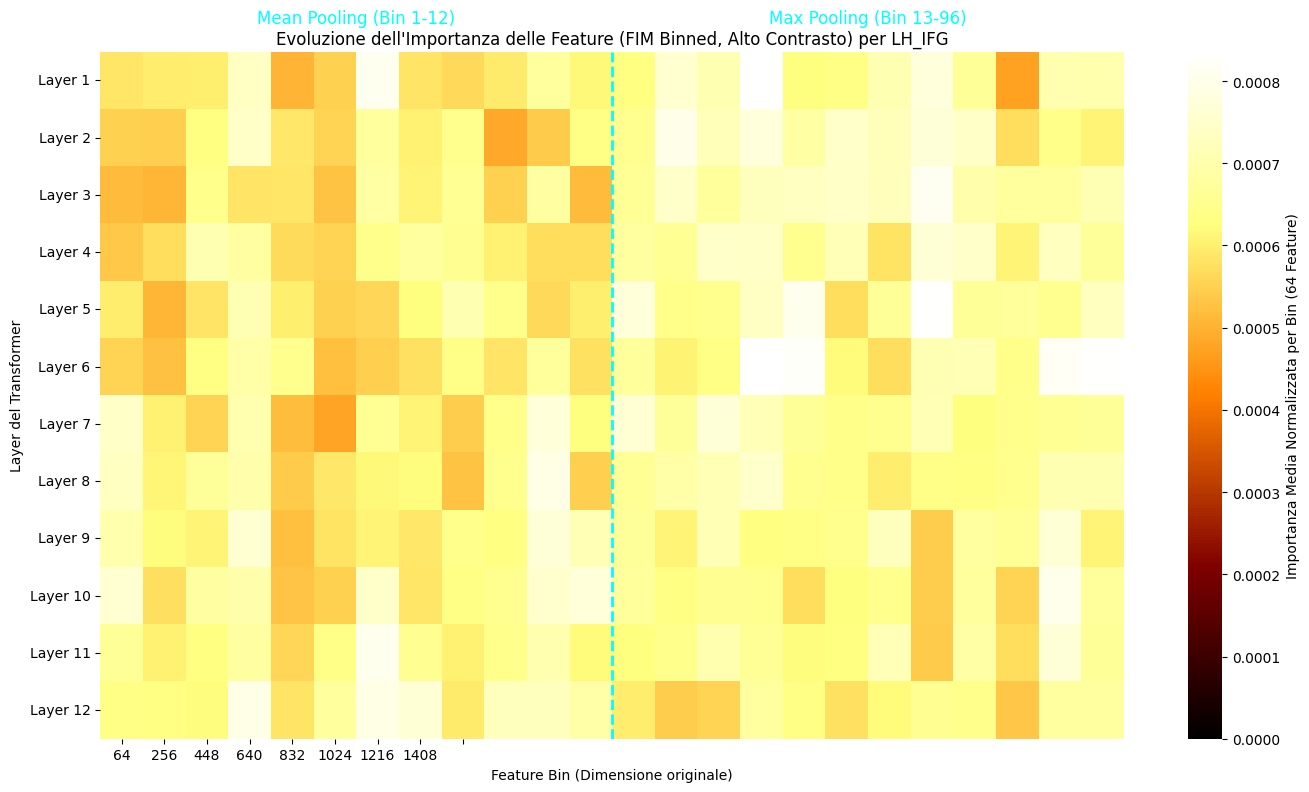

In [36]:
NUM_DIM_POOLING = 768
BIN_SIZE = 64
NUM_BINS_PER_BLOCK = NUM_DIM_POOLING // BIN_SIZE # 48
TARGET_ROI = 'LH_IFG' # <--- CAMBIA QUI: Scegli 'LH_AntTemp', 'LH_IFG', ecc.

# --- 1. Preparazione della Matrice con Binning ---

fim_binned_matrix = np.zeros((12, NUM_BINS_PER_BLOCK * 2))
layers_list = [f'Layer {i}' for i in range(1, 13)]

for layer_num in range(1, 13):
    layer_key = f'layer_{layer_num}'
    
    # Estrai il vettore FIM (1536 dimensioni)
    try:
        fim_vector = all_igs[layer_key][TARGET_ROI]
    except NameError:
        # Placeholder/Simulazione se all_igs non è caricato nel notebook
        np.random.seed(42 + layer_num)
        fim_vector = np.abs(np.random.randn(1536) * 0.1)
        
    # Normalizzazione L1 del FIM totale
    abs_fim = np.abs(fim_vector)
    fim_norm = abs_fim / np.sum(abs_fim)
    
    # Binning del blocco Mean Pooling (0:768)
    mean_vals = fim_norm[:NUM_DIM_POOLING]
    mean_binned = np.mean(mean_vals.reshape(-1, BIN_SIZE), axis=1)
    
    # Binning del blocco Max Pooling (768:1536)
    max_vals = fim_norm[NUM_DIM_POOLING:]
    max_binned = np.mean(max_vals.reshape(-1, BIN_SIZE), axis=1)
    
    fim_binned_matrix[layer_num - 1, :] = np.concatenate([mean_binned, max_binned])

# --- 2. Visualizzazione: Heatmap FIM Binned (Alto Contrasto) ---

plt.figure(figsize=(14, 8))

sns.heatmap(
    fim_binned_matrix,
    cmap='afmhot', # <--- NUOVA COLORMAP AD ALTO CONTRASTO
    yticklabels=layers_list,
    xticklabels=[i * BIN_SIZE for i in range(1, NUM_BINS_PER_BLOCK * 2 + 1, 3)] + [''],
    cbar_kws={'label': f'Importanza Media Normalizzata per Bin ({BIN_SIZE} Feature)'},
    vmin=0 
)

plt.title(f'Evoluzione dell\'Importanza delle Feature (FIM Binned, Alto Contrasto) per {TARGET_ROI}')
plt.ylabel('Layer del Transformer')
plt.xlabel(f'Feature Bin (Dimensione originale)')

# Aggiunge la linea verticale di separazione al bin 48
plt.axvline(x=NUM_BINS_PER_BLOCK, color='cyan', linestyle='--', linewidth=2, label='Separazione Pooling (Bin 48)')

# Aggiunge le etichette per Mean/Max sopra la heatmap
plt.text(NUM_BINS_PER_BLOCK / 2, -0.5, f'Mean Pooling (Bin 1-{NUM_BINS_PER_BLOCK})', 
         horizontalalignment='center', color='cyan', fontsize=12)
plt.text(NUM_BINS_PER_BLOCK + NUM_BINS_PER_BLOCK / 2, -0.5, f'Max Pooling (Bin {NUM_BINS_PER_BLOCK + 1}-96)', 
         horizontalalignment='center', color='cyan', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_36440\3925513324.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


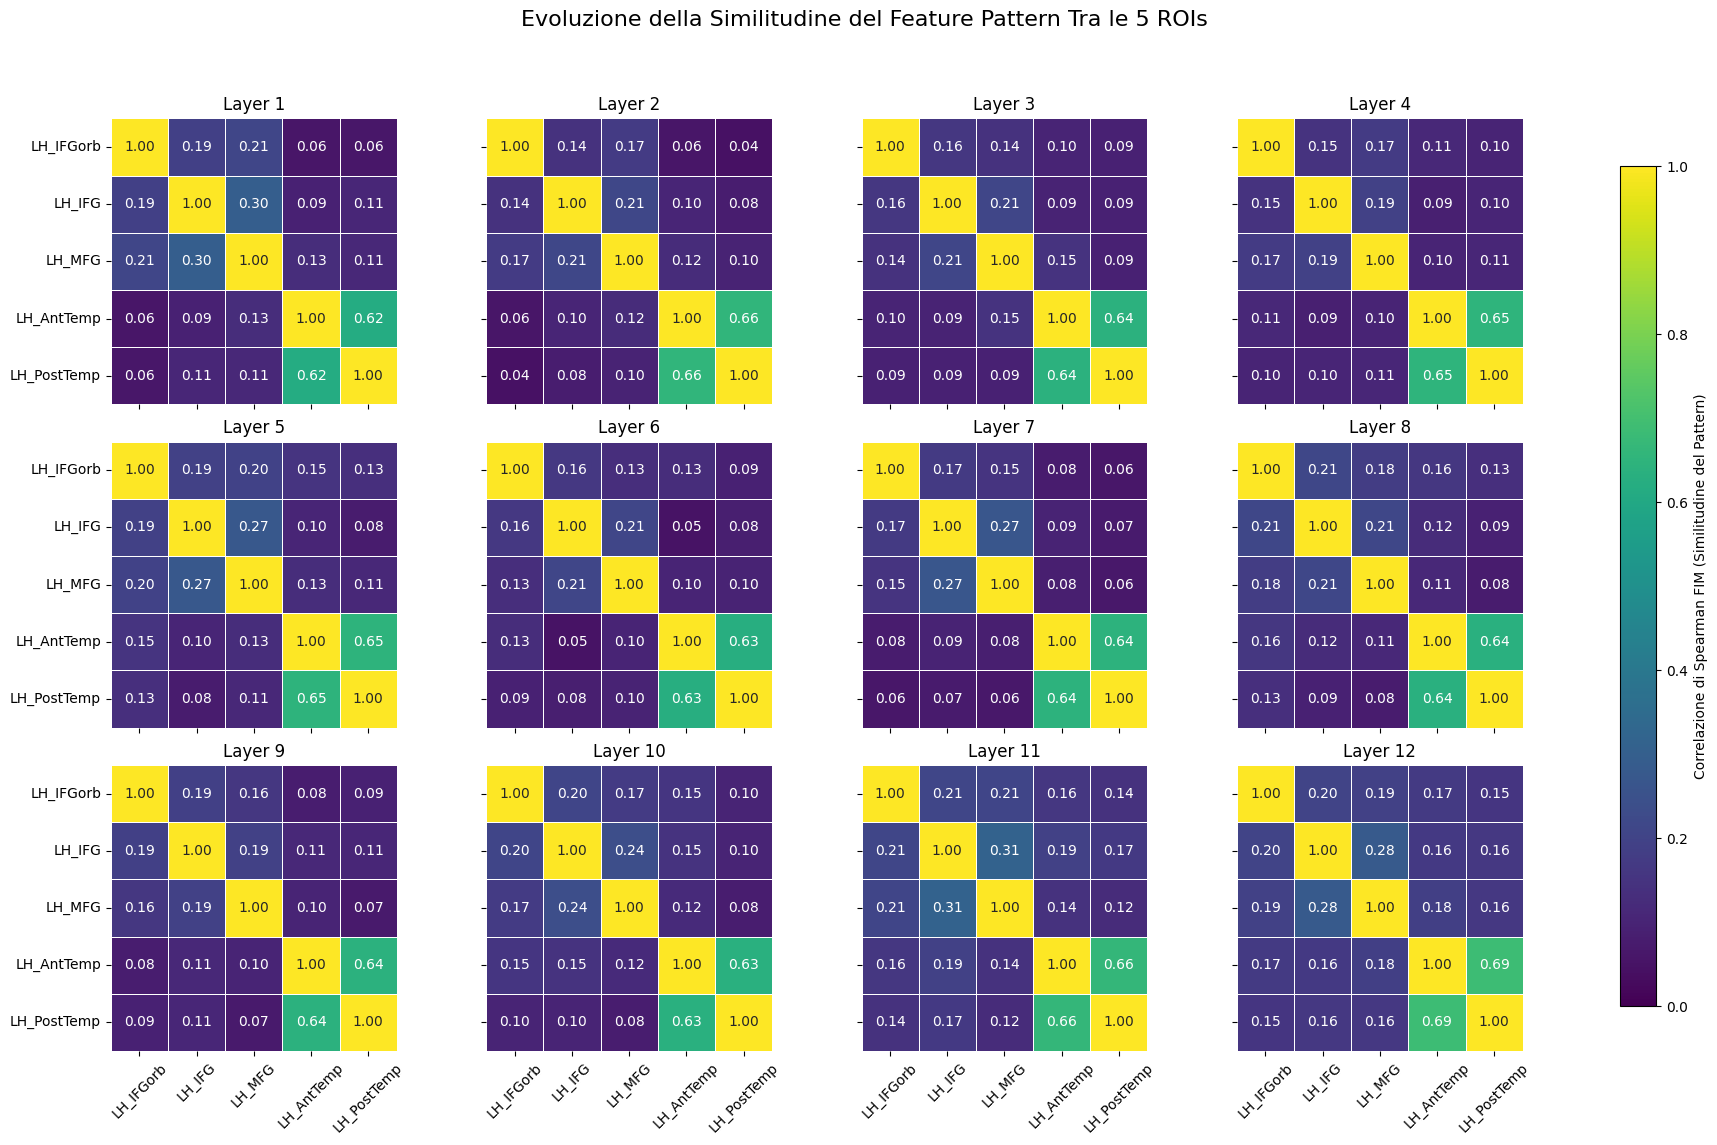


--- Matrice di Correlazione FIM per Layer 12 (Specializzazione Massima) ---
|             |   LH_IFGorb |   LH_IFG |   LH_MFG |   LH_AntTemp |   LH_PostTemp |
|:------------|------------:|---------:|---------:|-------------:|--------------:|
| LH_IFGorb   |       1.000 |    0.199 |    0.192 |        0.168 |         0.153 |
| LH_IFG      |       0.199 |    1.000 |    0.280 |        0.164 |         0.163 |
| LH_MFG      |       0.192 |    0.280 |    1.000 |        0.184 |         0.161 |
| LH_AntTemp  |       0.168 |    0.164 |    0.184 |        1.000 |         0.686 |
| LH_PostTemp |       0.153 |    0.163 |    0.161 |        0.686 |         1.000 |


In [37]:
rois = ['LH_IFGorb', 'LH_IFG', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp']
all_correlation_matrices = {}

# --- 1. Calcolo di Matrici di Correlazione 5x5 Layer-by-Layer ---

for layer_key, roi_data in all_igs.items():
    layer_num = int(layer_key.split('_')[1])
    
    # 1.a. Estrai e Normalizza tutti i FIM per il Layer corrente
    fim_vectors = {}
    for roi_name in rois:
        fim_vector = roi_data[roi_name]
        # Normalizzazione L1 del FIM (Valore Assoluto) su 1536 dimensioni
        abs_fim = np.abs(fim_vector)
        # Protezione divisione per zero
        if np.sum(abs_fim) == 0:
            fim_vectors[roi_name] = np.zeros_like(abs_fim)
        else:
            fim_vectors[roi_name] = abs_fim / np.sum(abs_fim)
        
    # 1.b. Calcola la Matrice di Correlazione 5x5
    corr_matrix = np.zeros((len(rois), len(rois)))
    
    for i in range(len(rois)):
        for j in range(len(rois)):
            # Correlazione di Spearman tra il FIM della ROI i e il FIM della ROI j
            # Questa è la misura della somiglianza del pattern
            correlation, _ = spearmanr(fim_vectors[rois[i]], fim_vectors[rois[j]])
            corr_matrix[i, j] = correlation
            
    # Memorizza la matrice nel dizionario
    all_correlation_matrices[layer_num] = pd.DataFrame(corr_matrix, index=rois, columns=rois)

# --- 2. Visualizzazione: 12 Heatmaps ---

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i in range(1, 13):
    matrix = all_correlation_matrices[i]
    ax = axes[i-1]
    
    sns.heatmap(
        matrix,
        ax=ax,
        annot=True,
        fmt=".2f",
        cmap='viridis', # Colormap sequenziale per la correlazione
        vmin=0.0,      # Forziamo un range standard per il confronto
        vmax=1.0,
        cbar=False,
        square=True,
        linewidths=.5,
    )
    ax.set_title(f'Layer {i}')
    
    # Pulizia dei tick labels per leggibilità
    if i % 4 != 1: # Rimuove yticklabels tranne che nella prima colonna
         ax.set_yticklabels([])
         ax.set_ylabel("")
    else:
         ax.tick_params(axis='y', rotation=0)
         
    if i < 9: # Rimuove xticklabels tranne che nell'ultima riga
         ax.set_xticklabels([])
         ax.set_xlabel("")
    else:
         ax.tick_params(axis='x', rotation=45)
    
# Aggiunge una colorbar generale
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # Posizione X, Y, W, H
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Correlazione di Spearman FIM (Similitudine del Pattern)')
    
fig.suptitle('Evoluzione della Similitudine del Feature Pattern Tra le 5 ROIs', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()

# --- Risultato Tabella per il Layer 12 ---
print("\n--- Matrice di Correlazione FIM per Layer 12 (Specializzazione Massima) ---")
print(all_correlation_matrices[12].to_markdown(floatfmt=".3f"))

C:\Users\andre\AppData\Local\Temp\ipykernel_36440\1045602200.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


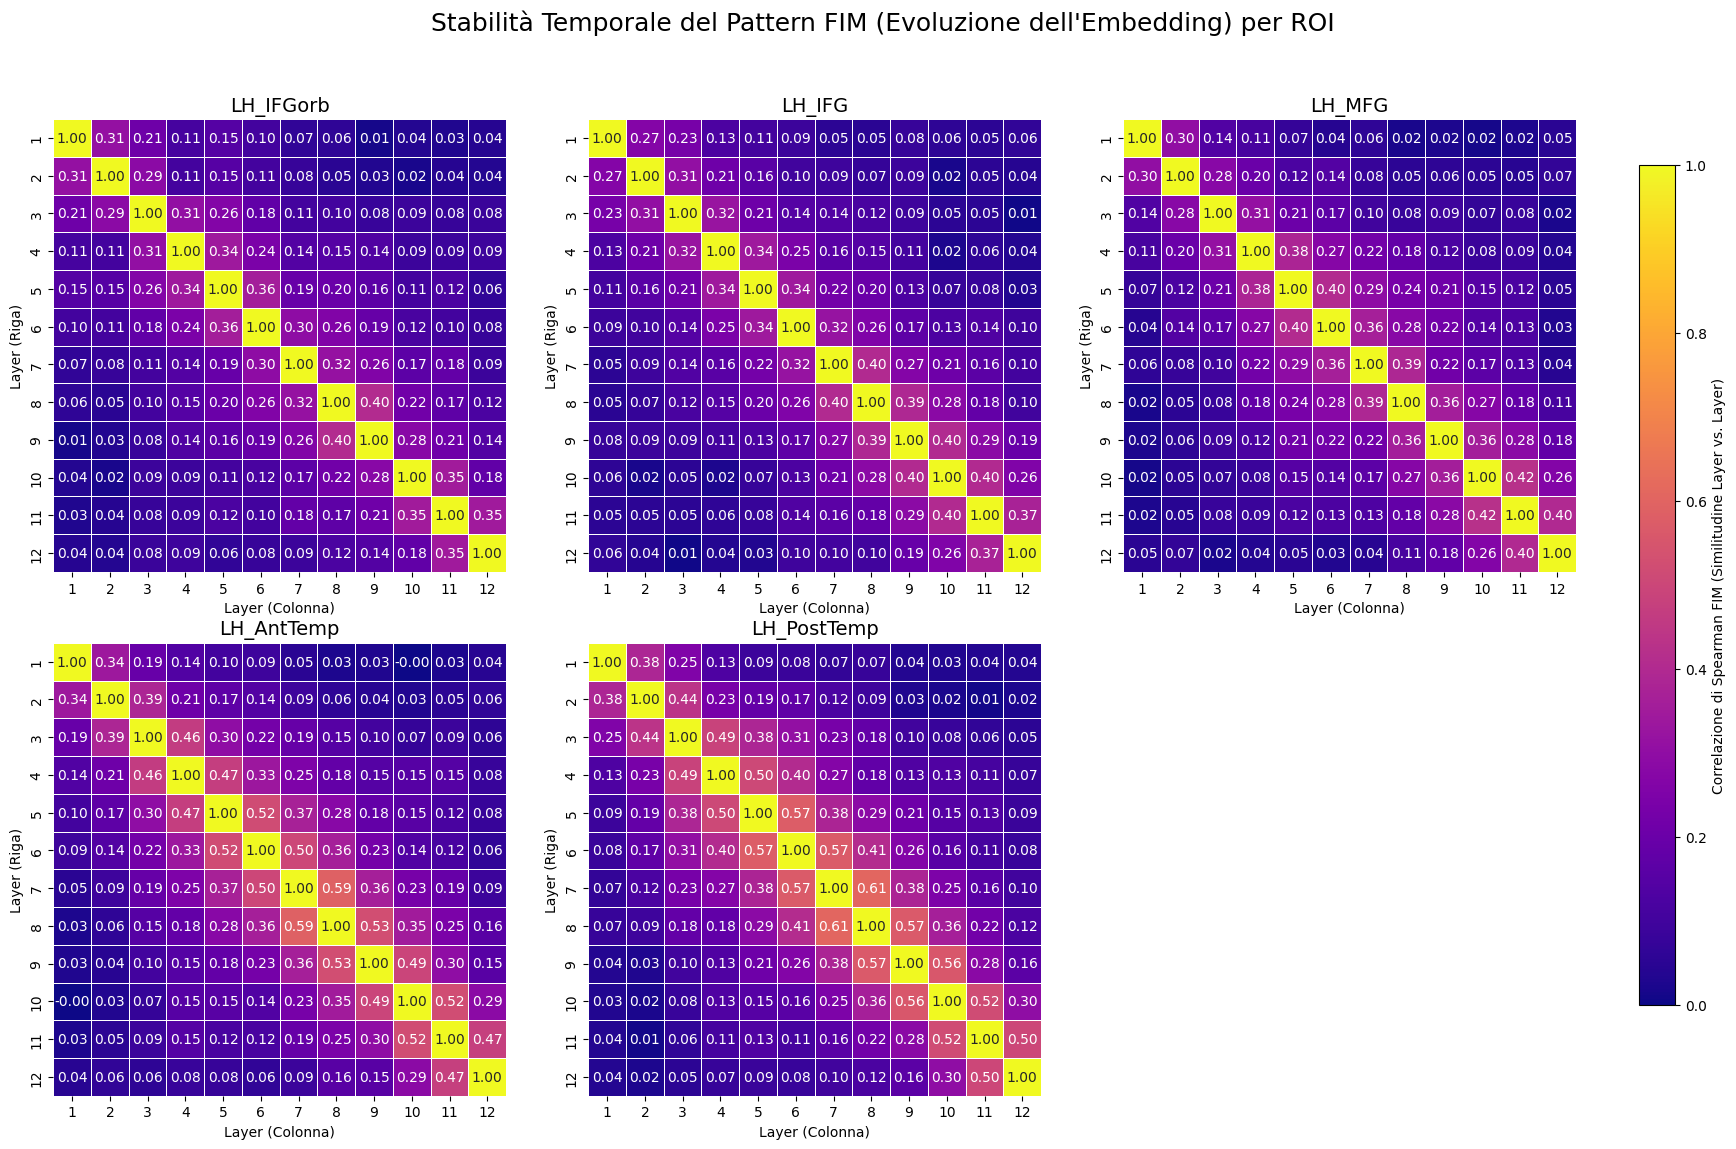

In [38]:
rois = ['LH_IFGorb', 'LH_IFG', 'LH_MFG', 'LH_AntTemp', 'LH_PostTemp']
layers = [f'layer_{i}' for i in range(1, 13)]
layer_nums = list(range(1, 13))
all_temporal_matrices = {}

# --- 1. Loop per Calcolare la Matrice 12x12 per Ogni ROI ---

for TARGET_ROI in rois:
    
    # Prepara i vettori FIM normalizzati per la ROI corrente
    fim_vectors_norm = {}
    for layer_key in layers:
        try:
            fim_vector = all_igs[layer_key][TARGET_ROI]
        except NameError:
            # Placeholder/Simulazione se all_igs non è definito
            np.random.seed(hash(TARGET_ROI) + int(layer_key.split('_')[1]))
            fim_vector = np.abs(np.random.randn(1536) + np.random.rand() * 0.5)
        
        # Normalizzazione L1 del FIM (su 1536 dimensioni)
        abs_fim = np.abs(fim_vector)
        # Protezione divisione per zero
        if np.sum(abs_fim) == 0:
            fim_vectors_norm[layer_key] = np.zeros_like(abs_fim)
        else:
            fim_vectors_norm[layer_key] = abs_fim / np.sum(abs_fim)

    # Calcolo della Matrice di Correlazione Layer 12x12
    corr_matrix_temporal = np.zeros((12, 12))

    for i in range(12):
        for j in range(12):
            layer_i_key = layers[i]
            layer_j_key = layers[j]
            
            # Correlazione di Spearman tra il FIM del Layer i e il FIM del Layer j
            correlation, _ = spearmanr(fim_vectors_norm[layer_i_key], fim_vectors_norm[layer_j_key])
            corr_matrix_temporal[i, j] = correlation

    df_temporal_corr = pd.DataFrame(corr_matrix_temporal, index=layer_nums, columns=layer_nums)
    all_temporal_matrices[TARGET_ROI] = df_temporal_corr

# --- 2. Visualizzazione: 5 Heatmaps in una Griglia ---

# Creazione della griglia (2 righe, 3 colonne - una cella sarà vuota)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, roi in enumerate(rois):
    matrix = all_temporal_matrices[roi]
    ax = axes[idx]
    
    sns.heatmap(
        matrix,
        ax=ax,
        annot=True,
        fmt=".2f",
        cmap='plasma', # Ottima per evidenziare la stabilità (diagonale)
        vmin=0.0,
        vmax=1.0,
        square=True,
        linewidths=.5,
        cbar=False
    )
    ax.set_title(f'{roi}', fontsize=14)
    ax.set_xlabel('Layer (Colonna)')
    ax.set_ylabel('Layer (Riga)')
    ax.tick_params(axis='x', rotation=0)
    
# Rimuovi l'ultimo subplot vuoto
fig.delaxes(axes[5])

# Aggiunge una colorbar generale
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Correlazione di Spearman FIM (Similitudine Layer vs. Layer)')
    
fig.suptitle('Stabilità Temporale del Pattern FIM (Evoluzione dell\'Embedding) per ROI', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()